In [1]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [2]:
pip install earthpy

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 994 kB 21.5 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 37.9 MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-py3-none-any.whl size=1365096 sha256=bb251ad6c4ff0e985141d2d4434ec3c3d2cc79addedd68e2d1e6f8273efa228a
  Stored in directory: /root/.cache/pip/wheels/80/4d/12/9d924aa338ecb211c35e6fff47330e3f6d14b8c74971c527ca
Successfully built earthpy


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Requirements :

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from osgeo import gdal
import sys
import os
from glob import glob
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
# To show the image
import rasterio
from rasterio.plot import show
# plot hists
import earthpy.plot as ep
import earthpy as et
import earthpy.spatial as es

In [5]:
## Read tif image as Array :

def tif_to_matrix(path):
  src_ds = gdal.Open(path)
  data = src_ds.ReadAsArray()
  return data 

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Dataset_2017to2020_Area1.csv')

In [7]:
df.head()

,date_time,soil_moisture_depth_0.05,Image_name
0,2017-04-12,0.168,20170412T110621_20170412T111708_T30TUL.tif
1,2017-05-02,0.124,20170502T110621_20170502T110937_T30TUL.tif
2,2017-05-22,0.225,20170522T110621_20170522T110912_T30TUL.tif
3,2017-06-01,0.167,20170601T110651_20170601T111225_T30TUL.tif
4,2017-06-11,0.141,20170611T110621_20170611T111012_T30TUL.tif


In [8]:
df.describe()

,soil_moisture_depth_0.05
count,169.000000
mean,0.194497
std,0.075803
min,0.090000
25%,0.135000
50%,0.192000
75%,0.235000
max,0.502000


In [9]:
 ## Collect images paths : 
 
 S_sentinel_bands = glob("/content/drive/MyDrive/Senti_Images-2017to2020_Area1/*UL.tif")

In [10]:
S_sentinel_bands[0]

'/content/drive/MyDrive/Senti_Images-2017to2020_newArea/20170412T110621_20170412T111708_T30TUL.tif'

In [11]:
data = tif_to_matrix(S_sentinel_bands[0])

In [12]:
data.shape #Image of 12 Bands with a size of 140*155

(12, 140, 155)

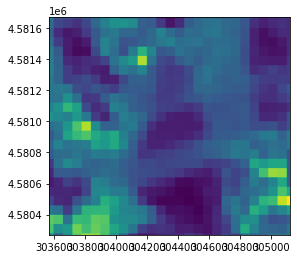

In [13]:
src = rasterio.open(S_sentinel_bands[0])
show(src)

In [14]:
## Calculate images dimensions : 

src.bounds
print("Image width is "+ str(src.bounds[2]-src.bounds[0])+"m, and height is "+ str(src.bounds[3]-src.bounds[1])+"m")
src.width, src.height

Image width is 1550.0m, and height is 1400.0m


(155, 140)

In [18]:
## Stack the images bands :

l = []
img = '/content/drive/MyDrive/Senti_Images-2017to2020_Area1/20190323T110721_20190323T110800_T30TUL.tif'
#img = '/content/drive/MyDrive/Senti_Images-2017to2020_Area1/20180726T110621_20180726T111615_T30TUL.tif'
#img = '/content/drive/MyDrive/Senti_Images-2017to2020_Area1/20181123T111351_20181123T111435_T30TUL.tif'

#for i in S_sentinel_bands[0]:
with rasterio.open(img) as f:
  for i in range (1,13): 
    l.append(f.read(i))

arr_st = np.stack(l)


In [16]:
arr_st.shape

(12, 146, 160)

NameError: ignored

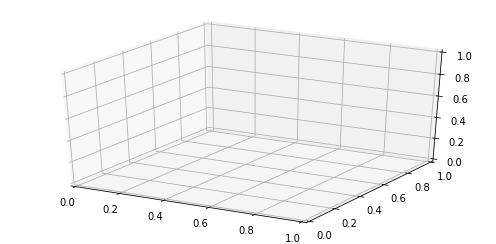

In [ ]:
## 3D Plot of image bands : 

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, x, y = data_norm.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()

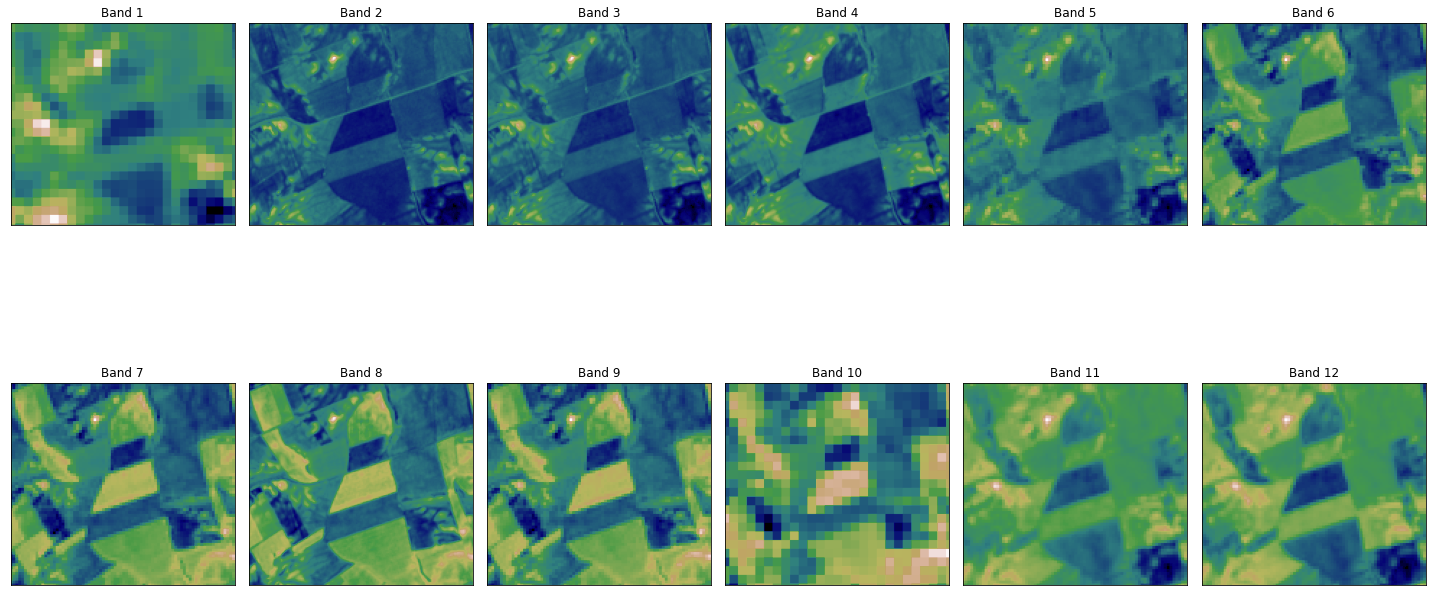

In [19]:
## Image Bands : Image from March 2019

ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

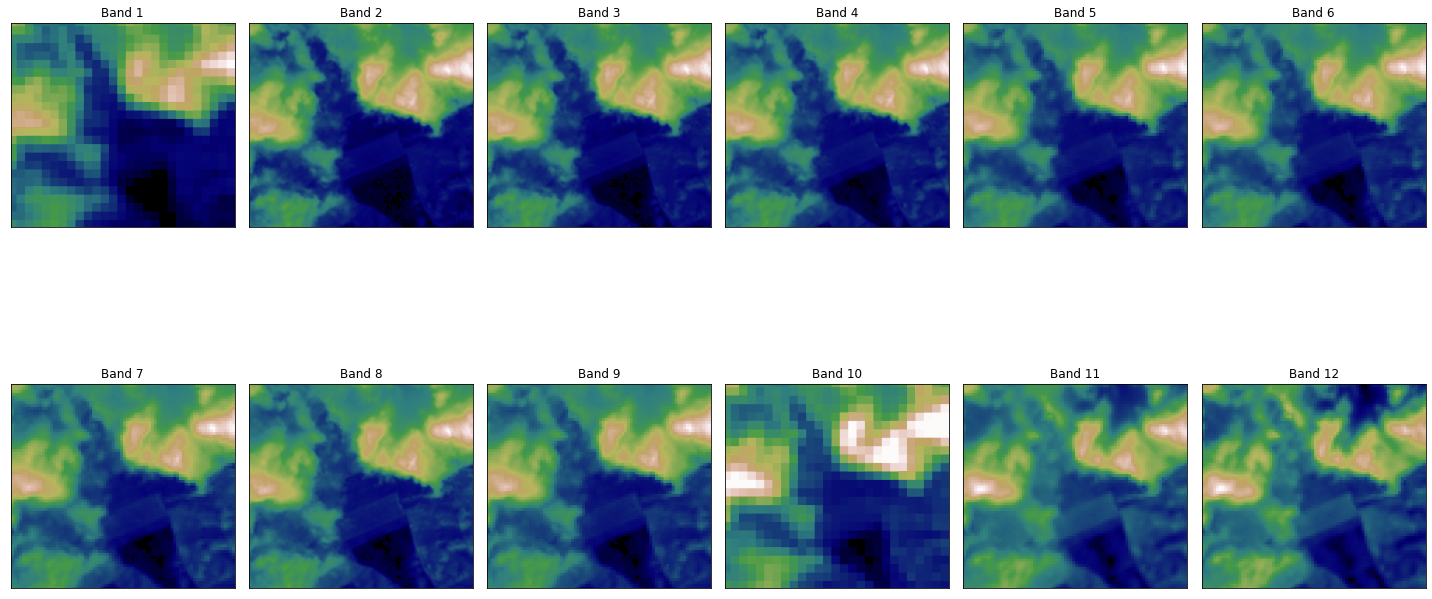

In [ ]:
## Image Bands : Image from November 2018 : 

ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

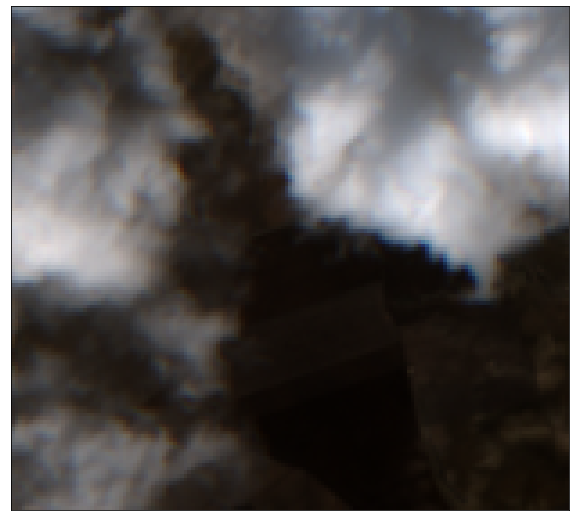

In [ ]:
# RGB Composite Image : Image from November 2018

ep.plot_rgb(arr_st,
            rgb=(3, 2, 1),
            
            str_clip=0.2)

#### The color infrared band combination is meant to emphasize healthy and unhealthy vegetation. By using the near-infrared (B8) band, it’s especially good at reflecting chlorophyll. This is why in a color infrared image, denser vegetation is red. But urban areas are white.

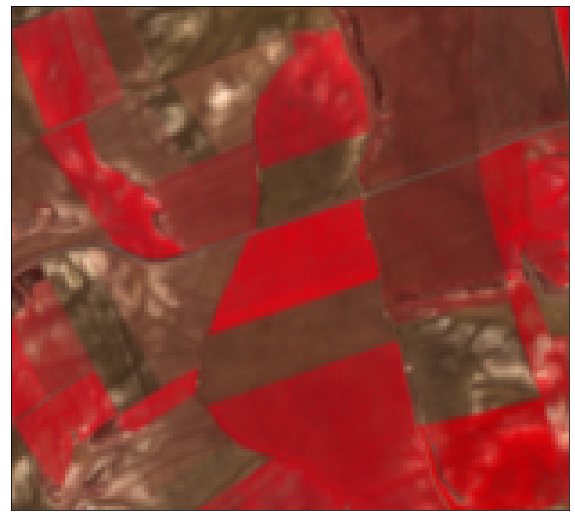

In [ ]:
# Color Infrared (B8, B4, B3) Composite Image : Image from March 2019

ep.plot_rgb(arr_st,
            rgb=(7, 3, 2),
            str_clip=0.2)

#### The short-wave infrared band combination uses SWIR (B12), NIR (B8A), and red (B4). This composite shows vegetation in various shades of green. In general, darker shades of green indicate denser vegetation. But brown is indicative of bare soil and built-up areas.

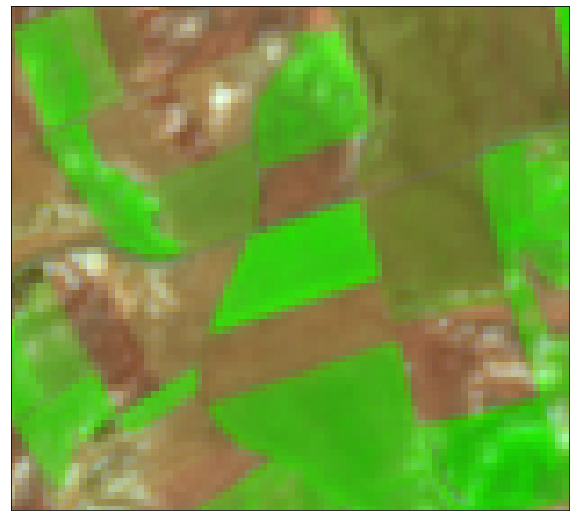

In [ ]:
# Agriculture (B11, B8, B2) Composite Image : Image from March 2019

ep.plot_rgb(arr_st,
            rgb=(11, 8, 3),
            str_clip=0.2)

#### The agriculture band combination uses SWIR-1 (B11), near-infrared (B8), and blue (B2). It’s mostly used to monitor the health of crops because of how it uses short-wave and near-infrared. Both these bands are particularly good at highlighting dense vegetation that appears as dark green

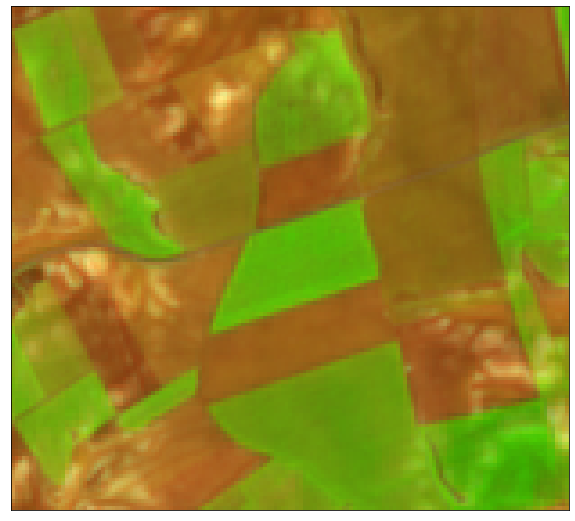

In [ ]:
# Short-Wave Infrared (B12, B8A, B4)Composite Image : Image from March 2019

ep.plot_rgb(arr_st,
            rgb=(10, 7, 1),
            str_clip=0.2)

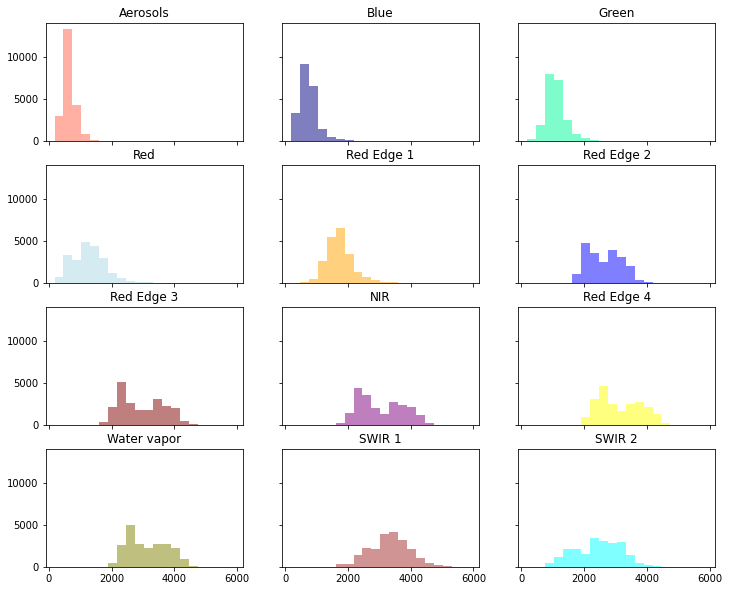

In [ ]:
## Histograms :  Image from March 2019

colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']
ep.hist(arr_st, 
         colors = colors,
        title=["Aerosols", "Blue", "Green", "Red","Red Edge 1", "Red Edge 2", "Red Edge 3","NIR","Red Edge 4", "Water vapor","SWIR 1", "SWIR 2"], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

In [20]:
## Read the images bands as mean of the bands:

list_box = []
for i in range(12):
  list_test = []
  for j in range(len(arr_st[i])):
    list_test.append(arr_st[i][j].mean())
  list_box.append(list_test)

In [21]:
numpy_array = np.array(list_box)
transpose = numpy_array.T
transpose_list = transpose.tolist()

In [22]:
bands_data = pd.DataFrame(transpose_list, columns=["Aerosols", "Blue", "Green", "Red","Red Edge 1", "Red Edge 2", "Red Edge 3","NIR","Red Edge 4", "Water vapor","SWIR 1", "SWIR 2"] )

In [23]:
bands_data.describe()

,Aerosols,Blue,Green,Red,Red Edge 1,Red Edge 2,Red Edge 3,NIR,Red Edge 4,Water vapor,SWIR 1,SWIR 2
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,661.516498,746.337558,1112.152857,1295.969078,1741.391014,2632.683364,2951.340230,3058.511889,3128.651843,3139.611797,3329.702903,2425.775253
std,44.784563,63.947709,73.404845,153.565137,104.847548,197.451287,284.200717,290.619820,286.003519,283.442870,213.241369,265.927660
min,565.600000,606.161290,951.083871,956.974194,1523.516129,2185.258065,2364.516129,2446.122581,2540.341935,2580.200000,2868.400000,1842.451613
25%,623.638710,692.572581,1052.758065,1194.904839,1665.683871,2504.704839,2753.595161,2855.030645,2922.179032,2933.664516,3180.012903,2227.593548
50%,671.322581,763.074194,1131.790323,1326.087097,1764.290323,2618.916129,2890.296774,2989.367742,3066.277419,3053.690323,3372.432258,2490.516129
75%,697.380645,786.832258,1158.811290,1393.803226,1818.493548,2784.372581,3186.198387,3285.212903,3353.400000,3387.567742,3498.896774,2586.566129
max,728.838710,877.387097,1254.083871,1604.161290,1924.851613,2996.129032,3488.038710,3615.851613,3668.729032,3667.683871,3672.219355,2899.400000


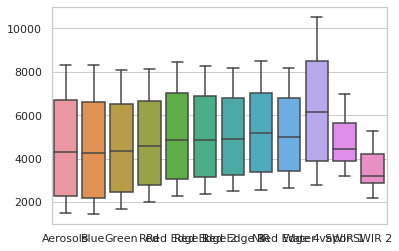

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot( data=bands_data)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<Figure size 1332x756 with 0 Axes>

No handles with labels found to put in legend.


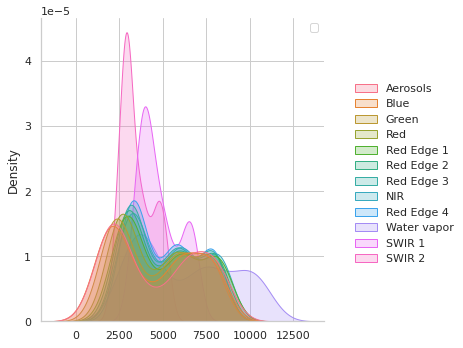

In [ ]:
sns.displot(data=bands_data,kind="kde",fill=True)
plt.legend(loc='upper right')

No handles with labels found to put in legend.


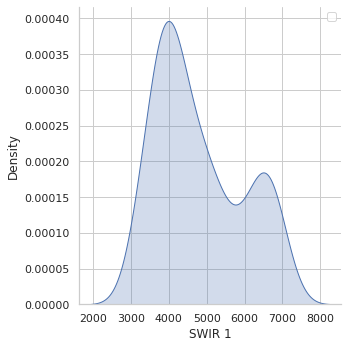

In [ ]:
sns.displot(data=bands_data, x='SWIR 1',kind="kde",fill=True)
plt.legend(loc='upper right')

# Features extractors indexes :


## Normalized Difference Vegetation Index (NDVI) :

To determine the density of green on a patch of land, researchers must observe the distinct colors (wavelengths) of visible(VIS) and near-infrared (NIR)sunlight reflected by the plants. The Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared which vegetation strongly reflects and red light (which vegetation absorbs). NDVI always ranges from -1 to +1.

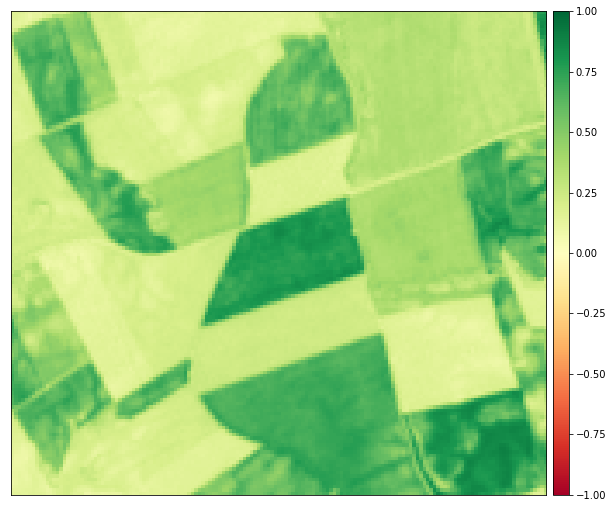

In [ ]:
## Normalized Difference Vegetation Index (NDVI) : Image from March 2019

ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

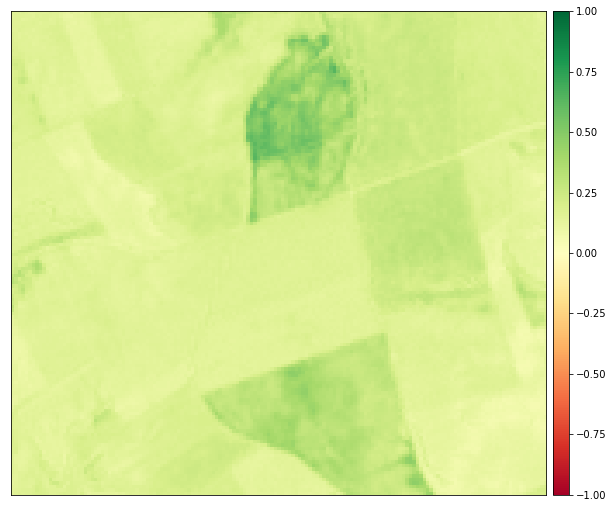

In [ ]:
## Normalized Difference Vegetation Index (NDVI) : Image from November 2018

ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

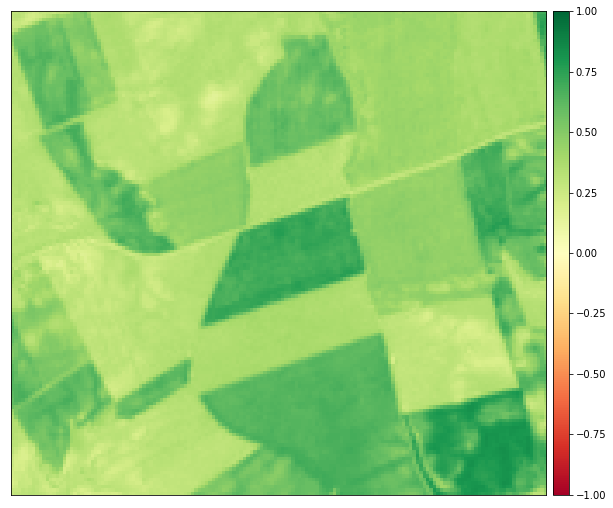

In [ ]:
## Normalized Difference Vegetation Index (NDVI) : Image from July 2018

gndvi = es.normalized_diff(arr_st[7], arr_st[2])

ep.plot_bands(gndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Soil Adjusted Vegetation Index (SAVI) :

The Soil-Adjusted Vegetation Index (SAVI) is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low.

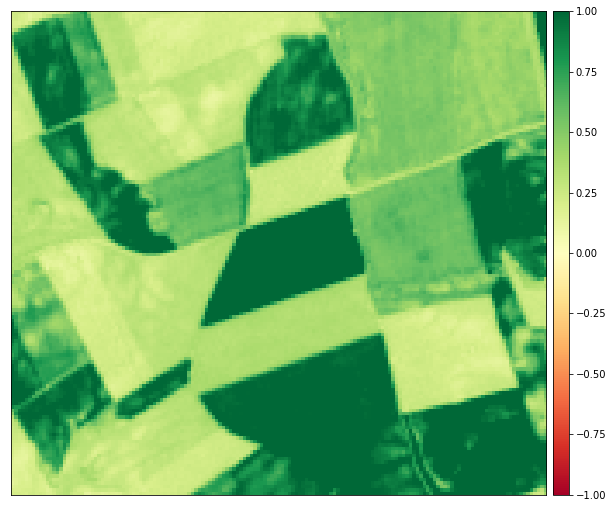

In [ ]:
## Image from March 2019 

L = 0.5

savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)

ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

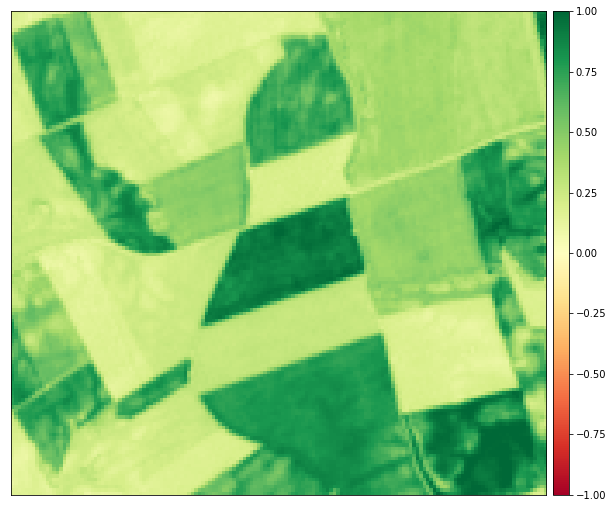

In [ ]:
## Image from November 2018

L = 0.16

osavi = (1.16*(arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) 

ep.plot_bands(osavi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Visible Atmospherically Resistant Index (VARI) :

The Visible Atmospherically Resistant Index (VARI) is designed to emphasize vegetation in the visible portion of the spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

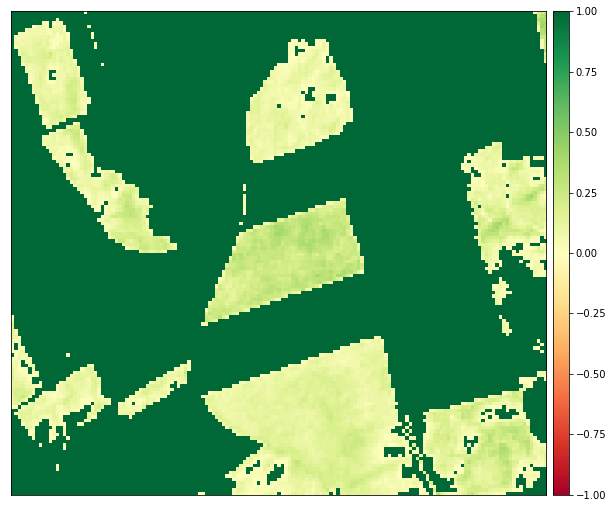

In [ ]:
## Image from March 2019 : 


vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14)) 

plt.show()

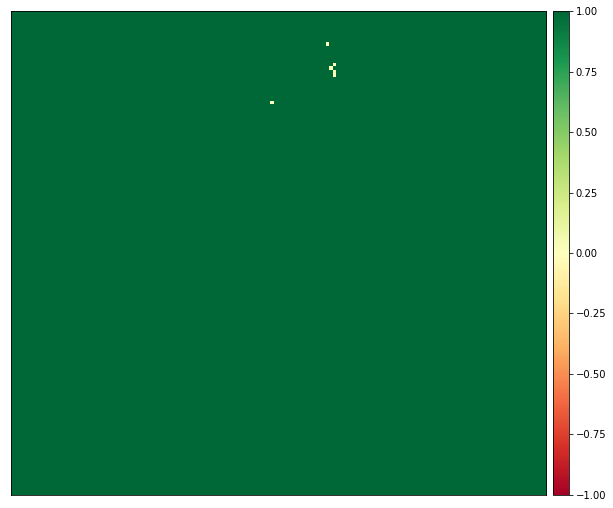

In [ ]:
## Image from November 2018 : 

vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14)) 

plt.show()

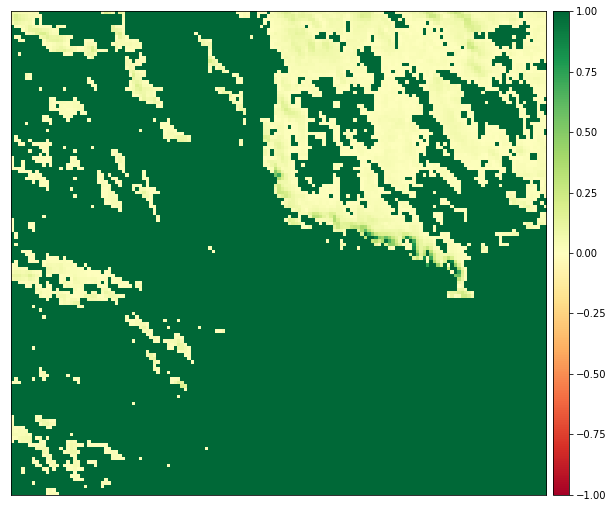

In [ ]:
## Image from July 2018 :

vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14)) 

plt.show()

## Modified Normalized Difference Water Index (MNDWI) :

The Modified Normalized Difference Water Index (MNDWI) uses green and SWIR bands for the enhancement of open water features. It also diminishes built-up area features that are often correlated with open water in other indices.

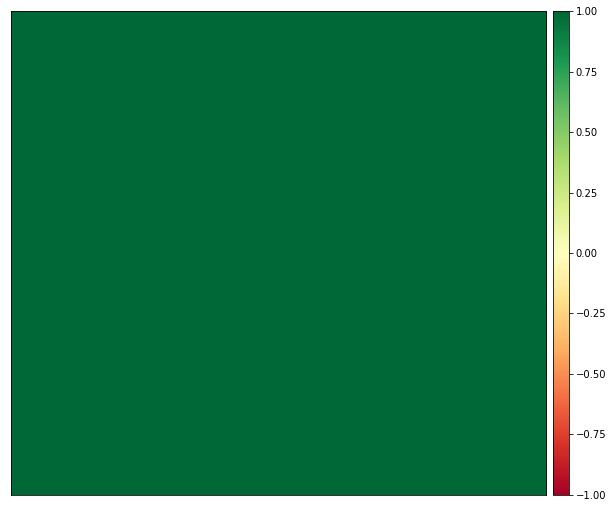

In [ ]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])

ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Normalized Difference Moisture Index (NDMI) : 

The Normalized Difference Moisture Index (NDMI) is sensitive to the moisture levels in vegetation. It is used to monitor droughts as well as monitor fuel levels in fire-prone areas. It uses NIR and SWIR bands to create a ratio designed to mitigate illumination and atmospheric effects.

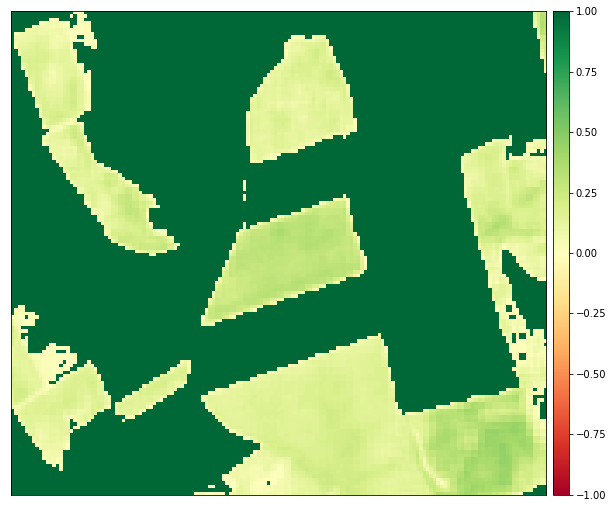

In [ ]:
## Image from March 2019:

ndmi = es.normalized_diff(arr_st[7], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

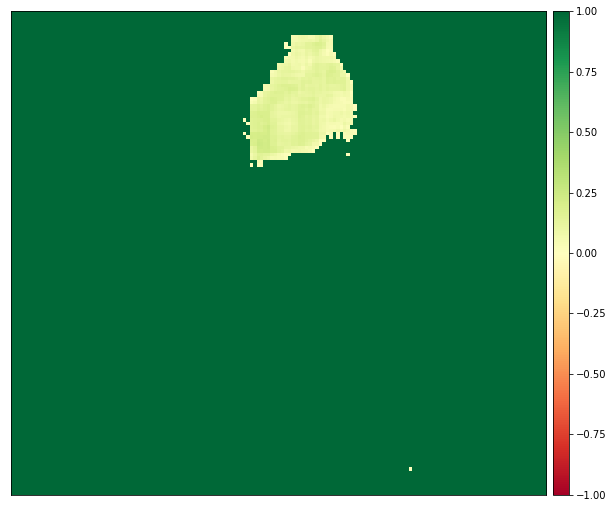

In [ ]:
## Image from November 2018:

ndmi = es.normalized_diff(arr_st[7], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

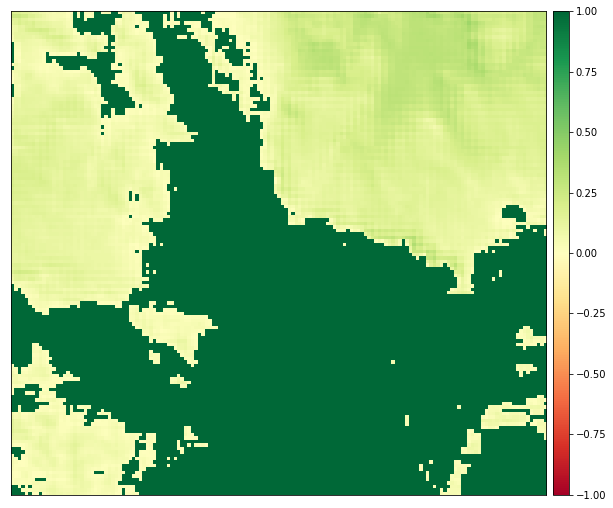

In [ ]:
## Image from July 2018:

ndmi = es.normalized_diff(arr_st[7], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

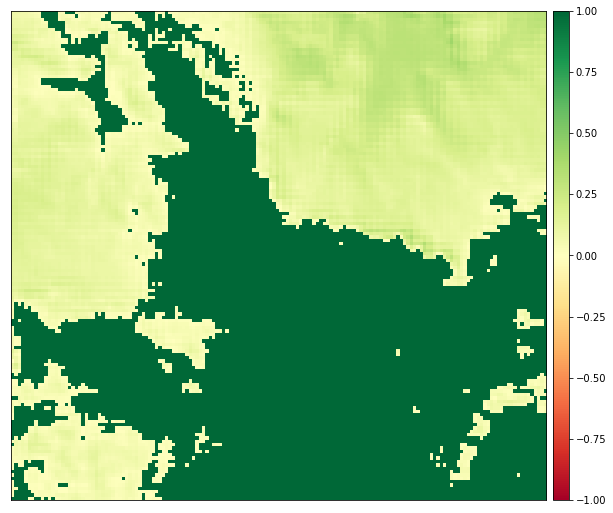

In [ ]:
# last Image at QF.tif :
ndmi = es.normalized_diff(arr_st[7], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Clay Minerals :
The clay ratio is a ratio of the SWIR1 and SWIR2 bands. This ratio leverages the fact that hydrous minerals such as clays, alunite absorb radiation in the 2.0–2.3 micron portion of the spectrum. This index mitigates illumination changes due to terrain since it is a ratio

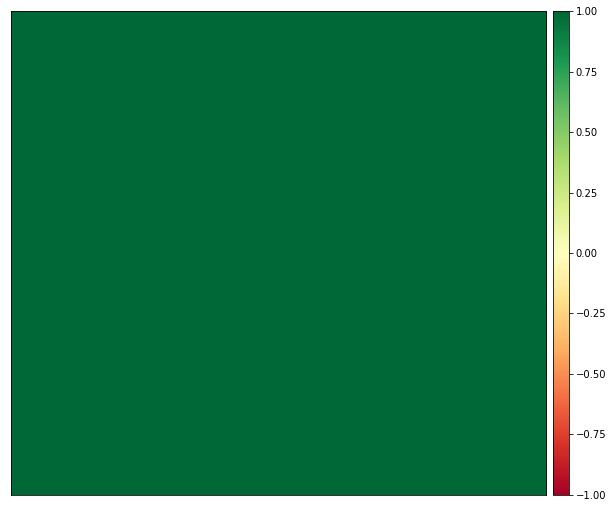

In [ ]:
cmr = np.divide(arr_st[10], arr_st[11])

ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [24]:
# Add an new column to dataframe :
 
def add_indice_to_df(indice,col_name, dataset):
  list_indice=[]
  for i in range (len(indice)):
    list_indice.append(indice[i].mean())  
  numpy_array = np.array(list_indice)
  transpose = numpy_array.T
  transpose_list = transpose.tolist()
  if transpose_list[0]> 1 or transpose_list[10]> 1 : 
    transpose_list = np.array(transpose_list)
    dataset[col_name]=normalize(transpose_list) 
  else : 
    dataset[col_name]=transpose_list
  return dataset


In [28]:
## Normalize bands into 0.0 - 1.0 scale :
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [25]:
bands_data_norm = bands_data.copy()

In [29]:
## Normalize image bands : 

for e in bands_data_norm.columns.values :
  bands_data_norm[e]=normalize (bands_data_norm[e])

In [30]:
## Add NDVI index to dataframe : 

ndvi = es.normalized_diff(arr_st[7], arr_st[3])
bands_data_norm = add_indice_to_df(ndvi,"NDVI",bands_data_norm)
bands_data_norm.head()

,Aerosols,Blue,Green,Red,Red Edge 1,Red Edge 2,Red Edge 3,NIR,Red Edge 4,Water vapor,SWIR 1,SWIR 2,NDVI
0,0.695913,0.600690,0.575365,0.820434,0.746202,0.000000,0.000000,0.000000,0.000000,0.000000,0.897048,0.906304,0.242499
1,0.730338,0.605804,0.568679,0.810216,0.721735,0.035112,0.035017,0.025603,0.036690,0.074015,0.871589,0.875082,0.249242
2,0.730338,0.646218,0.632599,0.816985,0.721735,0.035112,0.035017,0.067013,0.036690,0.074015,0.871589,0.875082,0.257809
3,0.730338,0.661180,0.632365,0.805770,0.726462,0.110435,0.097321,0.097128,0.092922,0.074015,0.852206,0.837298,0.266852
4,0.730338,0.636418,0.616885,0.782652,0.726462,0.110435,0.097321,0.116134,0.092922,0.074015,0.852206,0.837298,0.275432


In [32]:
import seaborn as sns

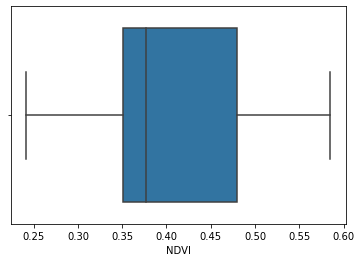

In [33]:
ax = sns.boxplot( data=bands_data_norm, x='NDVI')

No handles with labels found to put in legend.


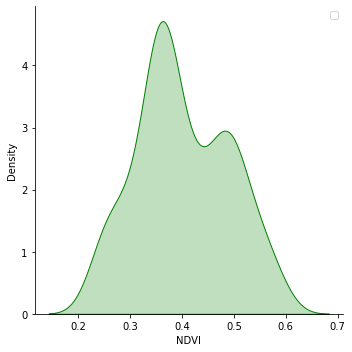

In [34]:
sns.displot(data=bands_data_norm, x='NDVI',kind="kde",fill=True, color='g')
plt.legend(loc='upper right')

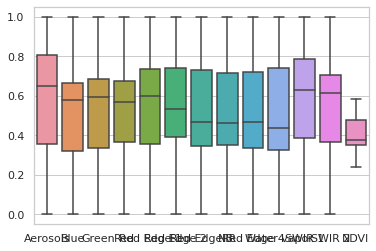

In [35]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot( data=bands_data_norm)

In [36]:
## Add NDMI index :

ndmi = es.normalized_diff(arr_st[7], arr_st[10])
bands_data_norm = add_indice_to_df(ndmi,"NDMI",bands_data_norm)
bands_data_norm.head()

,Aerosols,Blue,Green,Red,Red Edge 1,Red Edge 2,Red Edge 3,NIR,Red Edge 4,Water vapor,SWIR 1,SWIR 2,NDVI,NDMI
0,0.695913,0.600690,0.575365,0.820434,0.746202,0.000000,0.000000,0.000000,0.000000,0.000000,0.897048,0.906304,0.242499,1.000000
1,0.730338,0.605804,0.568679,0.810216,0.721735,0.035112,0.035017,0.025603,0.036690,0.074015,0.871589,0.875082,0.249242,0.992451
2,0.730338,0.646218,0.632599,0.816985,0.721735,0.035112,0.035017,0.067013,0.036690,0.074015,0.871589,0.875082,0.257809,0.975990
3,0.730338,0.661180,0.632365,0.805770,0.726462,0.110435,0.097321,0.097128,0.092922,0.074015,0.852206,0.837298,0.266852,0.913122
4,0.730338,0.636418,0.616885,0.782652,0.726462,0.110435,0.097321,0.116134,0.092922,0.074015,0.852206,0.837298,0.275432,0.887777


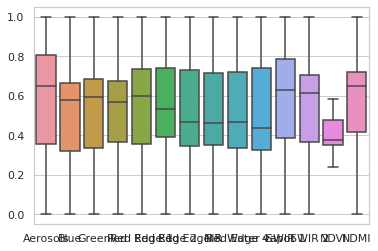

In [37]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot( data=bands_data_norm)

In [38]:
## Add SAVI index :

L = 0.5
savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)
bands_data_norm = add_indice_to_df(savi,"SAVI",bands_data_norm)
bands_data_norm.head()

,Aerosols,Blue,Green,Red,Red Edge 1,Red Edge 2,Red Edge 3,NIR,Red Edge 4,Water vapor,SWIR 1,SWIR 2,NDVI,NDMI,SAVI
0,0.695913,0.600690,0.575365,0.820434,0.746202,0.000000,0.000000,0.000000,0.000000,0.000000,0.897048,0.906304,0.242499,1.000000,0.363702
1,0.730338,0.605804,0.568679,0.810216,0.721735,0.035112,0.035017,0.025603,0.036690,0.074015,0.871589,0.875082,0.249242,0.992451,0.373815
2,0.730338,0.646218,0.632599,0.816985,0.721735,0.035112,0.035017,0.067013,0.036690,0.074015,0.871589,0.875082,0.257809,0.975990,0.386664
3,0.730338,0.661180,0.632365,0.805770,0.726462,0.110435,0.097321,0.097128,0.092922,0.074015,0.852206,0.837298,0.266852,0.913122,0.400228
4,0.730338,0.636418,0.616885,0.782652,0.726462,0.110435,0.097321,0.116134,0.092922,0.074015,0.852206,0.837298,0.275432,0.887777,0.413097


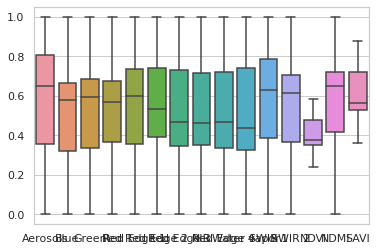

In [39]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot( data=bands_data_norm)

In [40]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])
bands_data_norm = add_indice_to_df(ndmi,"NDMI",bands_data_norm)
bands_data_norm.head()

,Aerosols,Blue,Green,Red,Red Edge 1,Red Edge 2,Red Edge 3,NIR,Red Edge 4,Water vapor,SWIR 1,SWIR 2,NDVI,NDMI,SAVI
0,0.695913,0.600690,0.575365,0.820434,0.746202,0.000000,0.000000,0.000000,0.000000,0.000000,0.897048,0.906304,0.242499,1.000000,0.363702
1,0.730338,0.605804,0.568679,0.810216,0.721735,0.035112,0.035017,0.025603,0.036690,0.074015,0.871589,0.875082,0.249242,0.992451,0.373815
2,0.730338,0.646218,0.632599,0.816985,0.721735,0.035112,0.035017,0.067013,0.036690,0.074015,0.871589,0.875082,0.257809,0.975990,0.386664
3,0.730338,0.661180,0.632365,0.805770,0.726462,0.110435,0.097321,0.097128,0.092922,0.074015,0.852206,0.837298,0.266852,0.913122,0.400228
4,0.730338,0.636418,0.616885,0.782652,0.726462,0.110435,0.097321,0.116134,0.092922,0.074015,0.852206,0.837298,0.275432,0.887777,0.413097


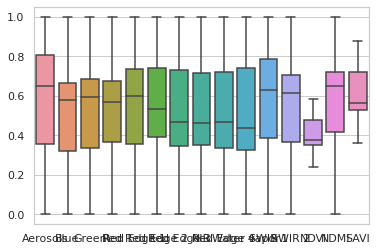

In [41]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot( data=bands_data_norm)

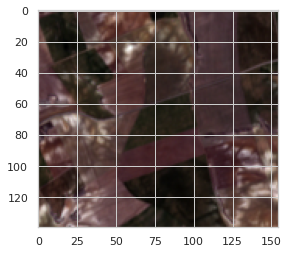

In [42]:
## visualize specific band combination : 

# Open the file:
raster = rasterio.open(S_sentinel_bands[0])

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((nir_norm, red_norm, green_norm))

# View the color composite
plt.imshow(nrg)

In [ ]:
## Open image as array with GDAL :

directory = '/content/drive/MyDrive/test'
data_list =[]
for filename in os.listdir(directory):
    if filename.endswith(".tif"):
      src_ds = gdal.Open( "/content/drive/MyDrive/test/" +str(filename))
      data=src_ds.ReadAsArray()
      data_list.append(data)
      print(filename)

In [45]:
# raster file and reads a band of the raster into a numpy array

filepath = S_sentinel_bands[0]

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
type(raster)

#img_array = ds.ReadAsArray()

osgeo.gdal.Dataset

In [46]:
# Projection
raster.GetProjection()

# Dimensions
print(raster.RasterXSize)
print(raster.RasterYSize)

# Number of bands
print(raster.RasterCount)

# Metadata for the raster dataset
raster.GetMetadata()

155
140
12


{'AREA_OR_POINT': 'Area'}

In [47]:
# Read the raster band as separate variable
band = raster.GetRasterBand(1)

# Check type of the variable 'band'
type(band)

# Data type of the values
gdal.GetDataTypeName(band.DataType)

'UInt16'

In [48]:
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

Statistics computed.
[ NO DATA VALUE ] =  None
[ MIN ] =  225.0
[ MAX ] =  2051.0


In [49]:
## Read Image as Array : 

data=raster.ReadAsArray()

In [50]:
## Visualize : 
type(data)
data.shape

(12, 140, 155)

In [51]:
## variance & mean :
np.var(data), np.mean(data)

(1359905.3692424034, 2337.794569892473)

In [52]:
 ## After normalize bands  : 

data_norm = normalize(data)
np.var(data_norm), np.std(data_norm)


(0.03807917326496982, 0.19513885636891956)

## correlation soil moisture Vs images :

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [54]:
!pip install heatmapz

In [55]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

In [56]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset_2017to2020_Area1.csv")

In [57]:
## Create a dataset of images bands means :

import os
List_images = []
L = 0.5
directory = r'/content/drive/MyDrive/Senti_Images-2017to2020_Area1'
for filename in os.listdir(directory):
    if filename.endswith("UL.tif") :
        image = tif_to_matrix(os.path.join(directory, filename))
        list_bands=[]
        for i in range (12) :
          band = normalize(image[i])
          list_bands.append(band.mean())
        List_images.append(list_bands)
        
List_images = np.array(List_images)

In [58]:
df_bands = pd.DataFrame(List_images,columns=['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B10','B11'])

In [63]:
df_bands['soil_moisture'] = df["soil_moisture_depth_0.05"]

In [60]:
## Correlatiion Matrix :

df_bands.corr()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,soil_moisture
B1,1.000000,0.774352,0.722312,0.683294,0.665478,0.444122,0.332767,0.295461,0.270347,0.434642,0.474341,0.590494,0.000297
B2,0.774352,1.000000,0.975521,0.875965,0.862809,0.691490,0.577944,0.579845,0.514859,0.440025,0.524502,0.587043,-0.036750
B3,0.722312,0.975521,1.000000,0.891606,0.918050,0.760908,0.661429,0.657889,0.604860,0.479752,0.572295,0.594308,-0.046965
B4,0.683294,0.875965,0.891606,1.000000,0.950794,0.663245,0.564980,0.588068,0.539037,0.376657,0.793035,0.797771,-0.284337
B5,0.665478,0.862809,0.918050,0.950794,1.000000,0.772310,0.688296,0.691231,0.665468,0.485776,0.778894,0.732059,-0.190049
B6,0.444122,0.691490,0.760908,0.663245,0.772310,1.000000,0.969084,0.938561,0.930364,0.671496,0.469084,0.384578,-0.030303
B7,0.332767,0.577944,0.661429,0.564980,0.688296,0.969084,1.000000,0.974395,0.979796,0.711321,0.417535,0.308053,-0.078464
B8,0.295461,0.579845,0.657889,0.588068,0.691231,0.938561,0.974395,1.000000,0.973957,0.696747,0.459356,0.342325,-0.122135
B8A,0.270347,0.514859,0.604860,0.539037,0.665468,0.930364,0.979796,0.973957,1.000000,0.718325,0.438953,0.308755,-0.135510
B9,0.434642,0.440025,0.479752,0.376657,0.485776,0.671496,0.711321,0.696747,0.718325,1.000000,0.315865,0.263120,-0.084233


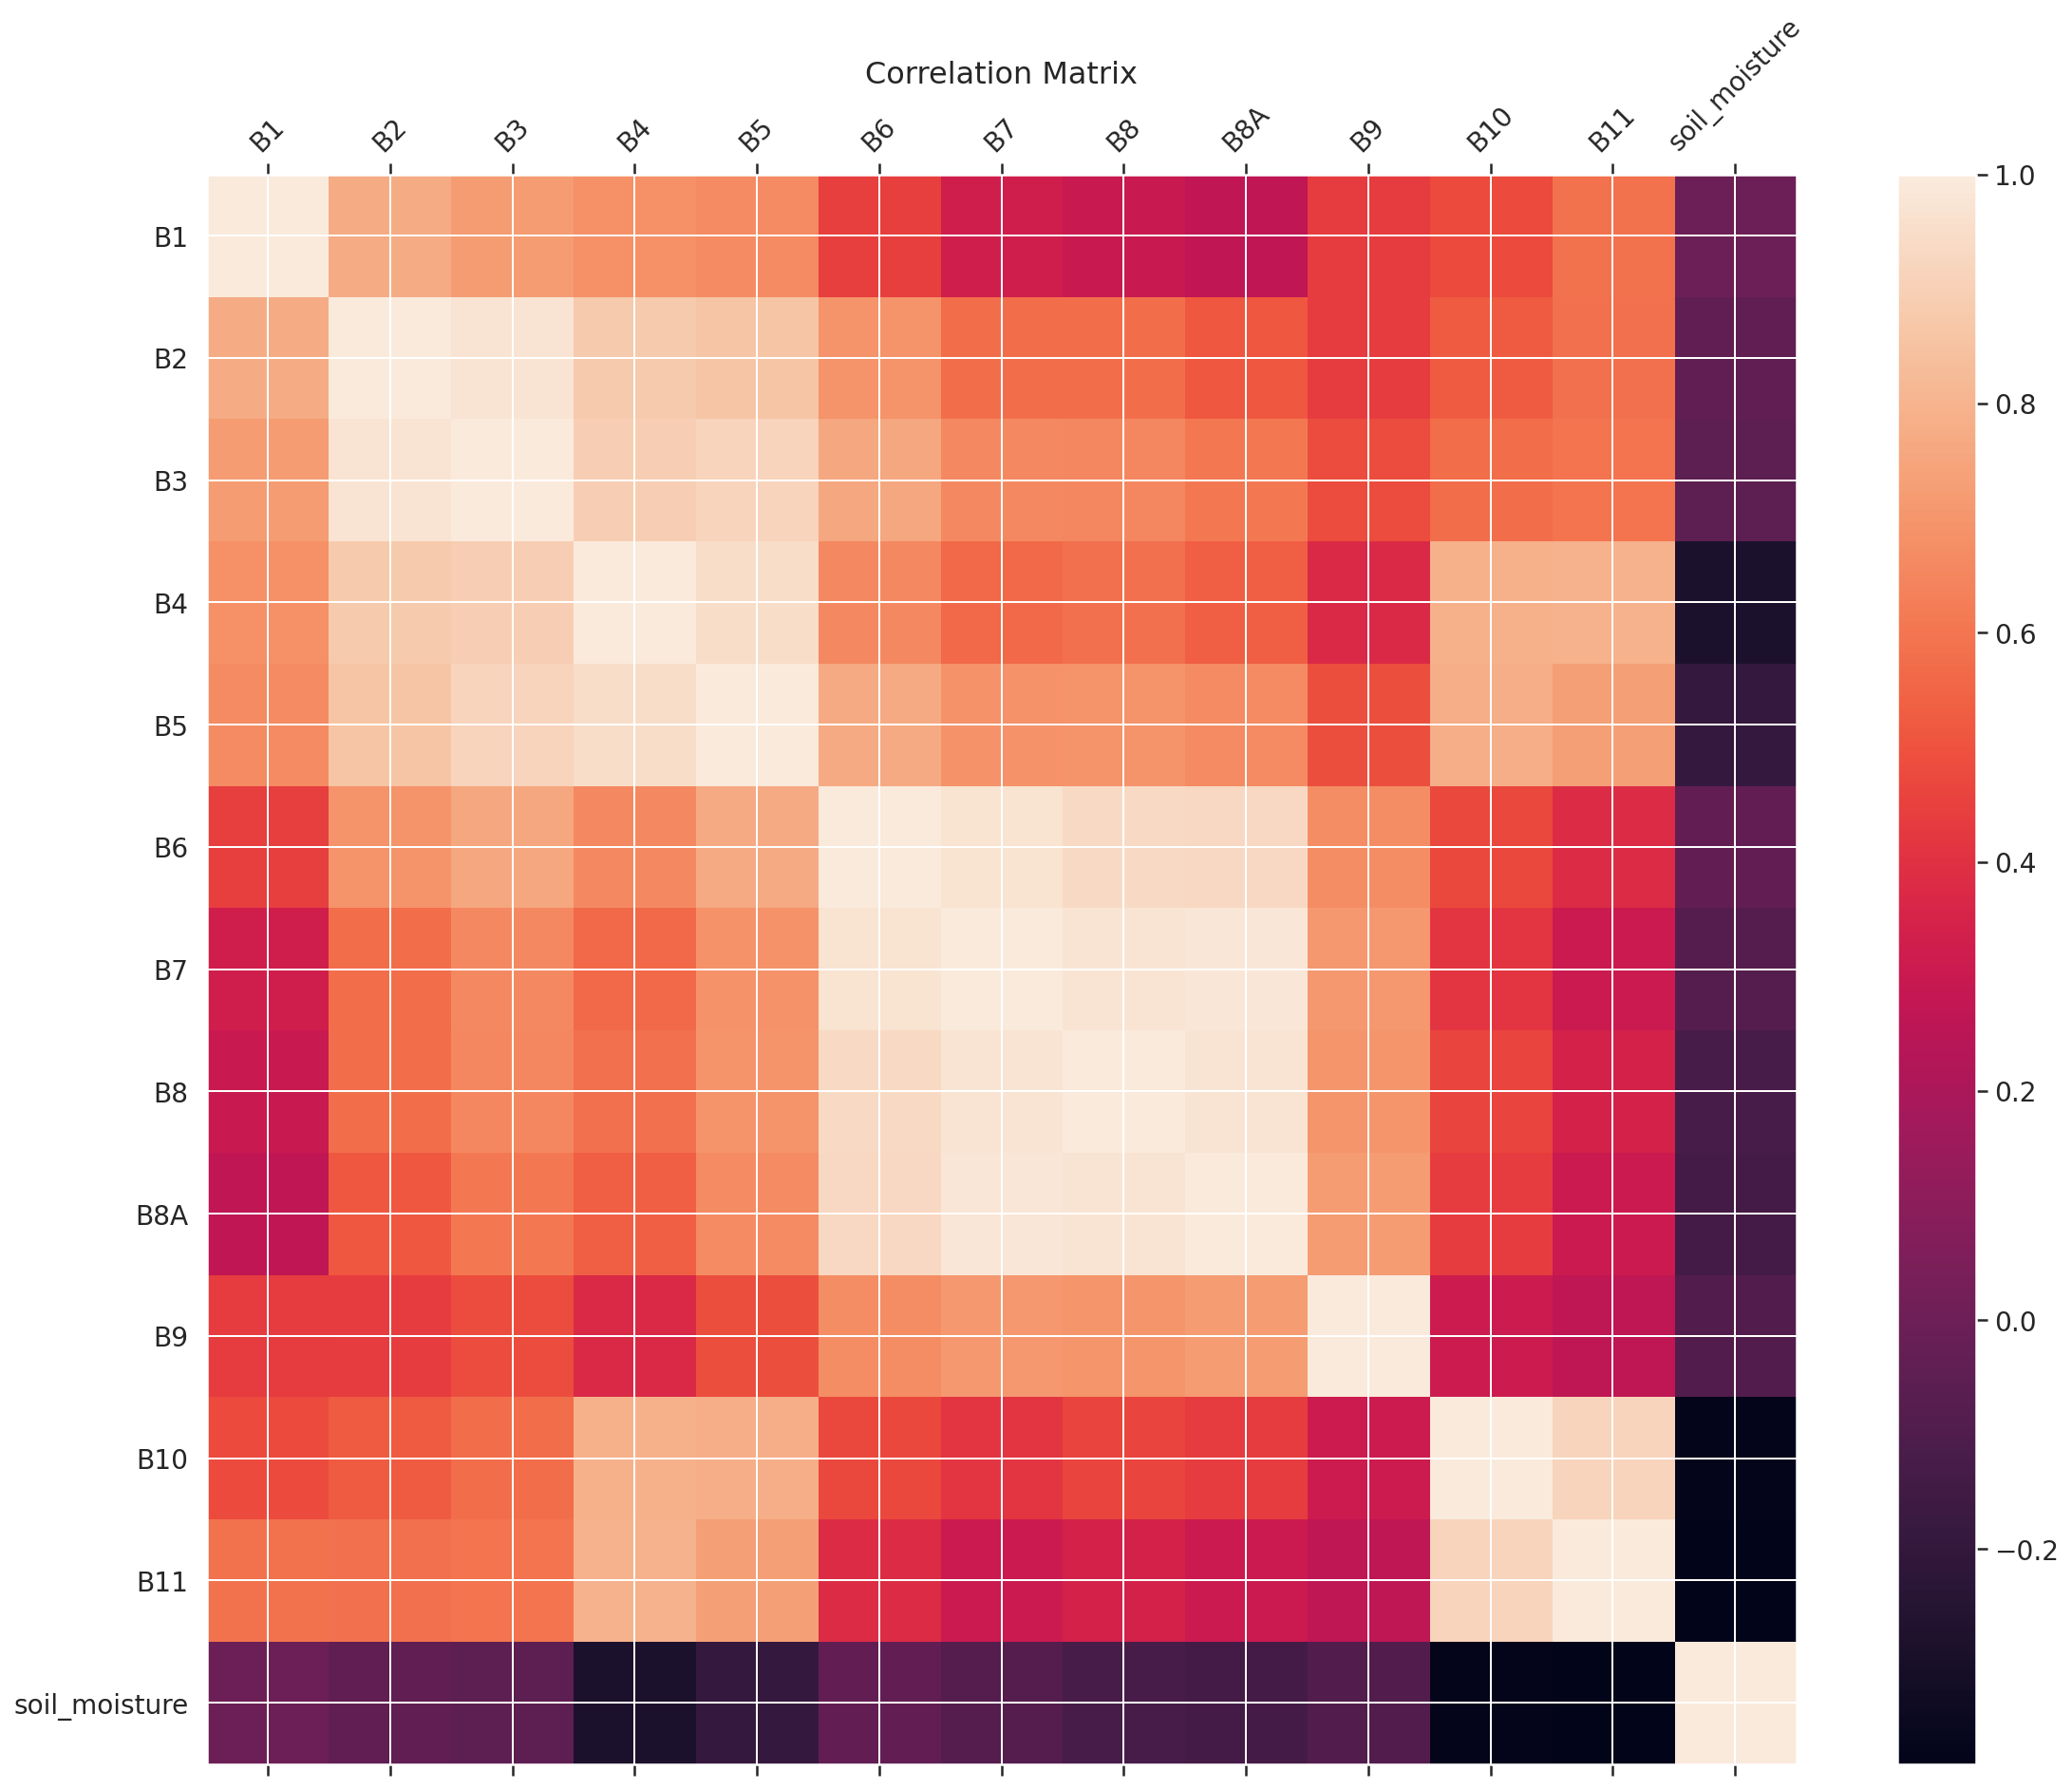

In [61]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_bands.corr(), fignum=f.number)
plt.xticks(range(df_bands.select_dtypes(['number']).shape[1]), df_bands.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_bands.select_dtypes(['number']).shape[1]), df_bands.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [64]:
import os
List_images = []
L = 0.5
directory = r'/content/drive/MyDrive/Senti_Images-2017to2020_Area1'
for filename in os.listdir(directory):
    if filename.endswith("QF.tif") :
        image = tif_to_matrix(os.path.join(directory, filename))
        list_bands=[]
        for i in range (12) :
          band = normalize(image[i])
          band2 = (band.mean())**2
          list_bands.append(band.mean())
          list_bands.append(band2)
        List_images.append(list_bands)
        
List_images = np.array(List_images)

In [65]:
## Check the non-linear correllations : 

df_bands = pd.DataFrame(List_images,columns=['B1','B1*2','B2','B2*2','B3','B3*2','B4','B4*2','B5','B5*2','B6','B6*2','B7','B7*2','B8','B8*2','B8A','B8A*2','B9','B9*2','B10','B10*2','B11','B11*2'])

In [67]:
df_bands['soil_moisture'] = df["soil_moisture_depth_0.05"]

In [68]:
df_bands.corr()

,B1,B1*2,B2,B2*2,B3,B3*2,B4,B4*2,B5,B5*2,B6,B6*2,B7,B7*2,B8,B8*2,B8A,B8A*2,B9,B9*2,B10,B10*2,B11,B11*2,soil_moisture
B1,1.000000,0.983011,0.736075,0.699067,0.676676,0.666472,0.657467,0.676753,0.627179,0.643614,0.341434,0.351393,0.237412,0.255040,0.204155,0.225393,0.159186,0.168643,0.341038,0.329106,0.510867,0.506485,0.601046,0.591771,-0.277837
B1*2,0.983011,1.000000,0.770804,0.753533,0.725532,0.729551,0.690658,0.717502,0.671655,0.696589,0.404471,0.422811,0.292720,0.317875,0.260772,0.288575,0.214037,0.229578,0.339233,0.338161,0.520237,0.517986,0.590657,0.586810,-0.245771
B2,0.736075,0.770804,1.000000,0.977568,0.967896,0.959480,0.869923,0.876722,0.833354,0.839905,0.577741,0.588906,0.458722,0.480024,0.482373,0.509509,0.389935,0.402851,0.324935,0.341264,0.577956,0.567153,0.605926,0.600914,-0.284845
B2*2,0.699067,0.753533,0.977568,1.000000,0.947512,0.977523,0.807959,0.834186,0.782826,0.807639,0.586046,0.611517,0.481876,0.513551,0.505452,0.542536,0.409070,0.429187,0.332954,0.355792,0.497736,0.490131,0.532708,0.532569,-0.203594
B3,0.676676,0.725532,0.967896,0.947512,1.000000,0.981823,0.877397,0.880801,0.900197,0.902988,0.665240,0.672162,0.557608,0.571751,0.575168,0.595304,0.491805,0.500555,0.388657,0.404050,0.617647,0.604765,0.595197,0.587121,-0.262425
B3*2,0.666472,0.729551,0.959480,0.977523,0.981823,1.000000,0.828047,0.850150,0.850375,0.871622,0.661404,0.682081,0.564320,0.589079,0.582016,0.612245,0.493602,0.509468,0.391387,0.412455,0.547689,0.538791,0.540888,0.538177,-0.194713
B4,0.657467,0.690658,0.869923,0.807959,0.877397,0.828047,1.000000,0.992081,0.933071,0.926063,0.567598,0.562239,0.448011,0.459250,0.484286,0.498964,0.411917,0.419975,0.292491,0.302939,0.825029,0.821560,0.813502,0.814144,-0.285676
B4*2,0.676753,0.717502,0.876722,0.834186,0.880801,0.850150,0.992081,1.000000,0.928414,0.935420,0.577161,0.580104,0.464597,0.482346,0.499261,0.520664,0.423906,0.436551,0.303919,0.316925,0.816703,0.819534,0.807250,0.813494,-0.248597
B5,0.627179,0.671655,0.833354,0.782826,0.900197,0.850375,0.933071,0.928414,1.000000,0.992314,0.723292,0.717530,0.625512,0.631909,0.639172,0.648982,0.594573,0.601238,0.446036,0.454522,0.809210,0.803736,0.730176,0.726351,-0.216407
B5*2,0.643614,0.696589,0.839905,0.807639,0.902988,0.871622,0.926063,0.935420,0.992314,1.000000,0.727461,0.730487,0.634853,0.647939,0.647336,0.663705,0.600010,0.611549,0.453366,0.465700,0.797491,0.798444,0.723542,0.725142,-0.183273


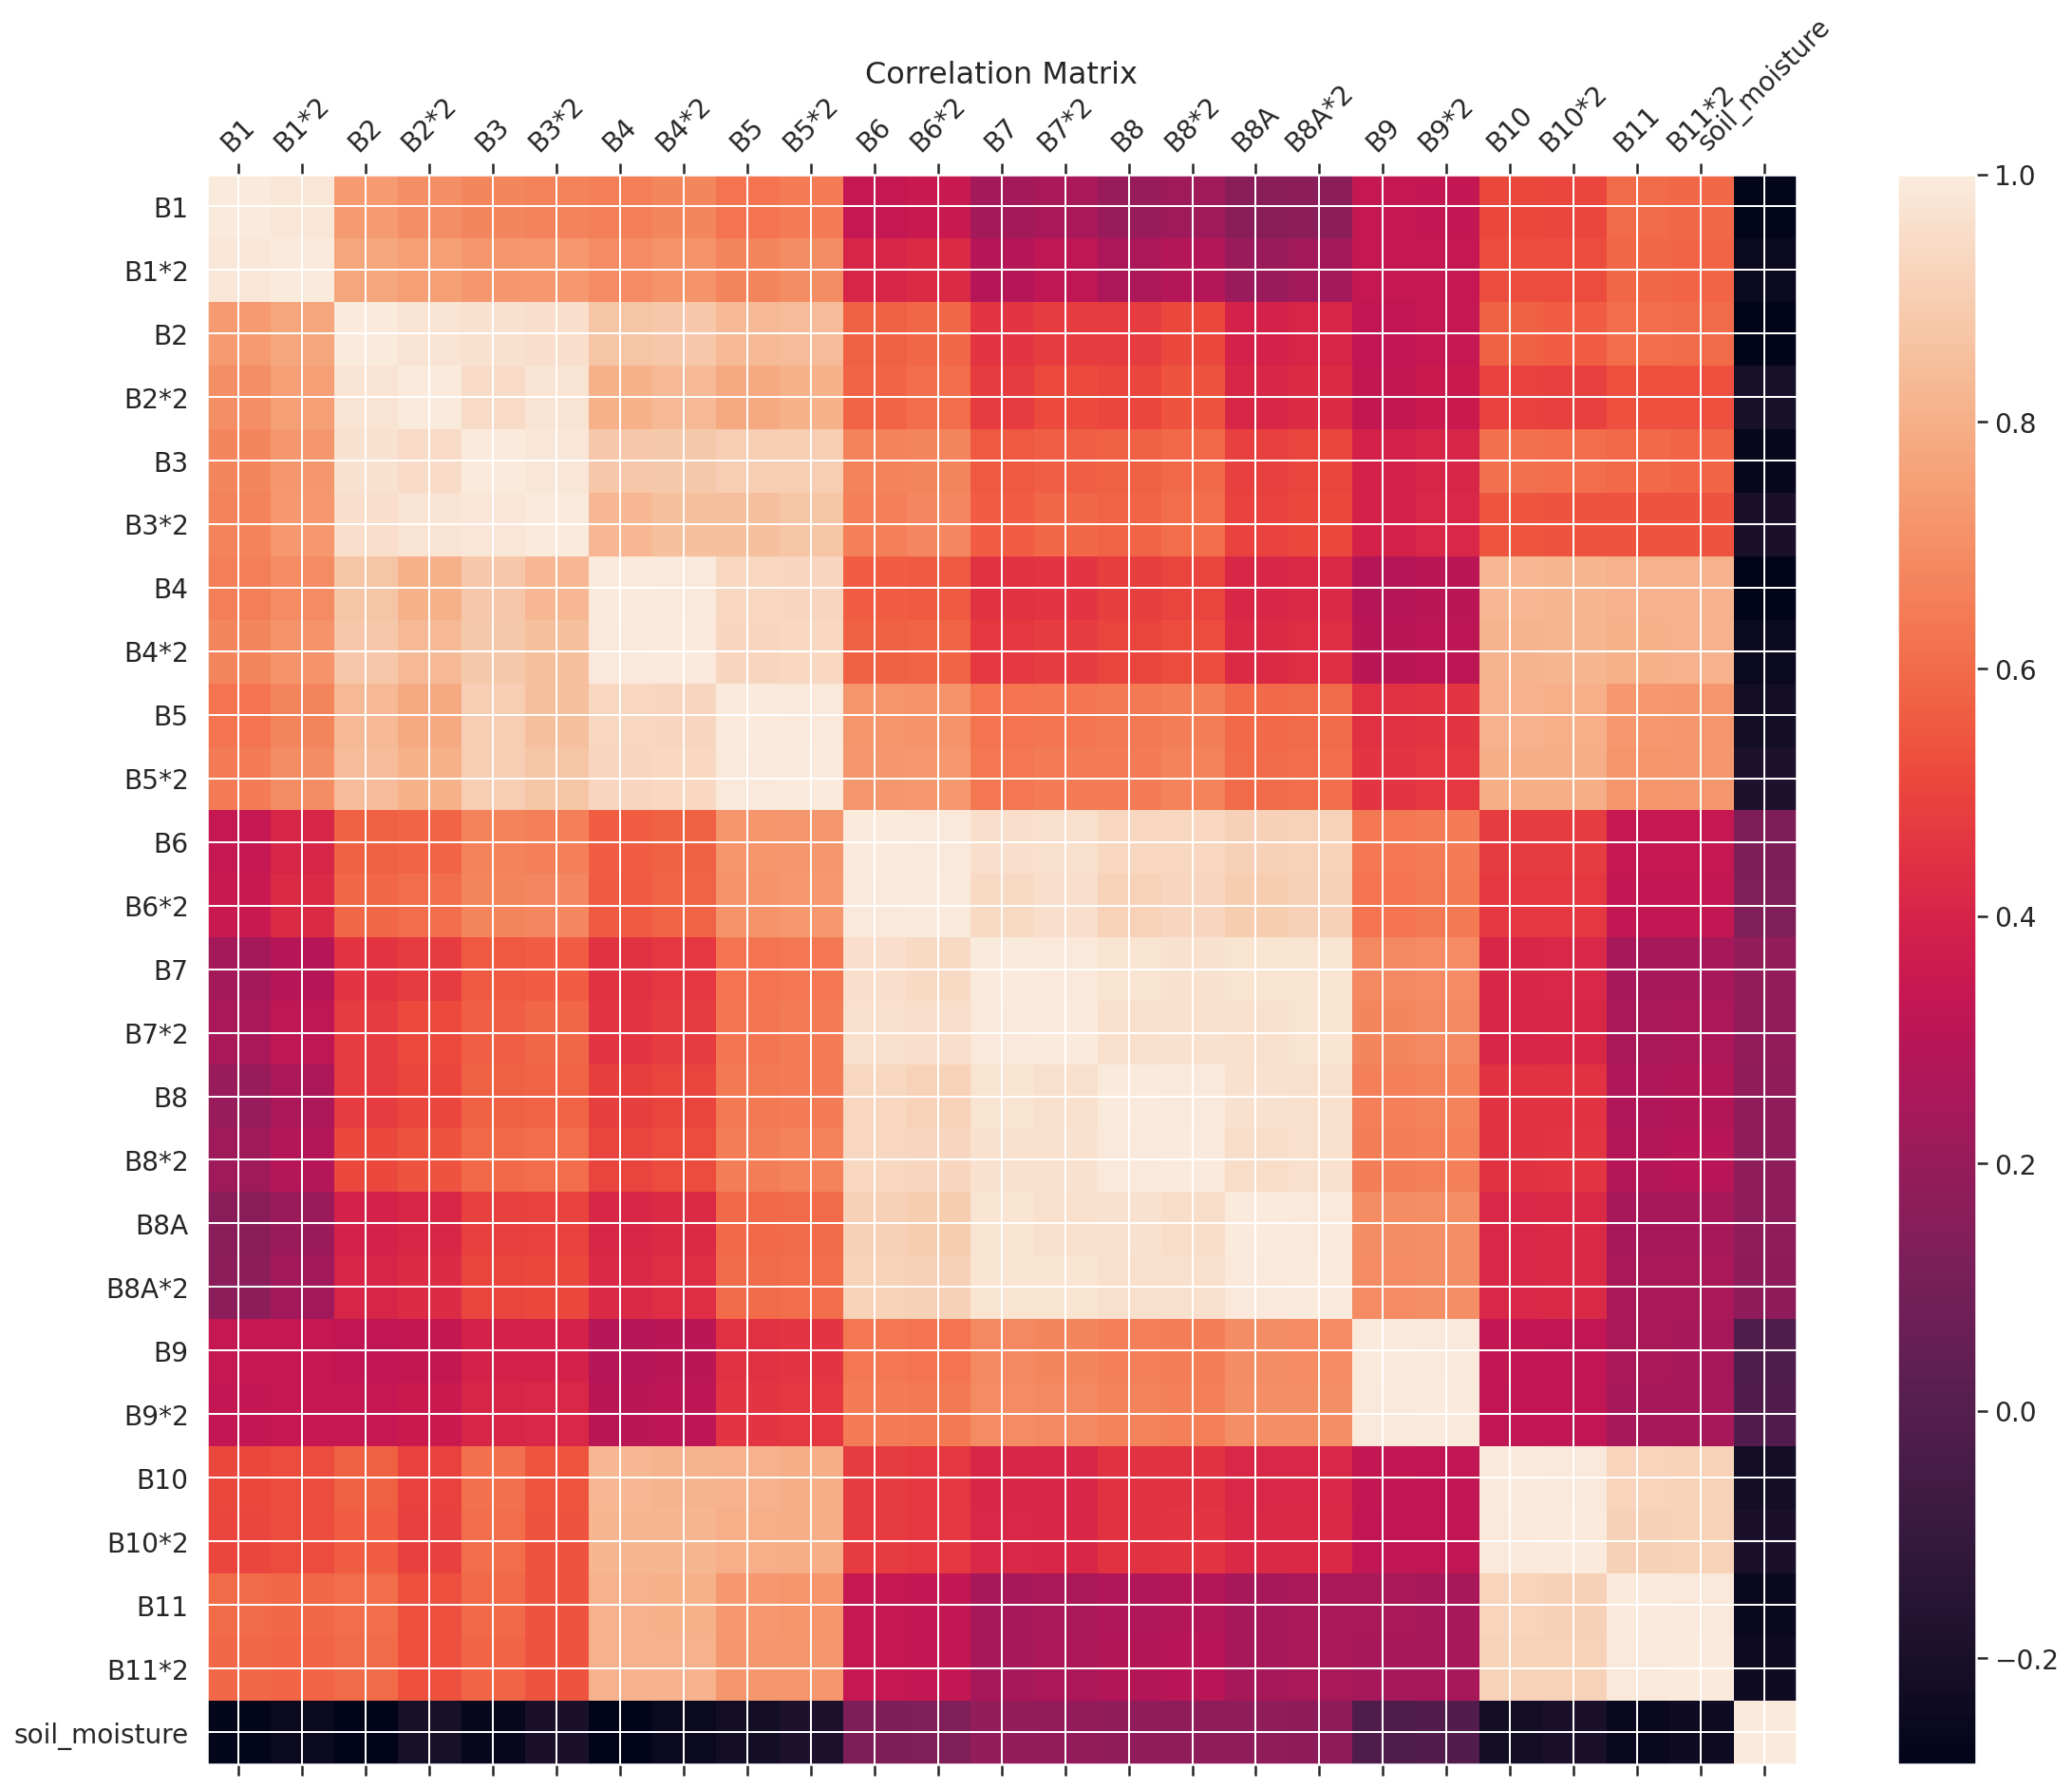

In [69]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_bands.corr(), fignum=f.number)
plt.xticks(range(df_bands.select_dtypes(['number']).shape[1]), df_bands.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_bands.select_dtypes(['number']).shape[1]), df_bands.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

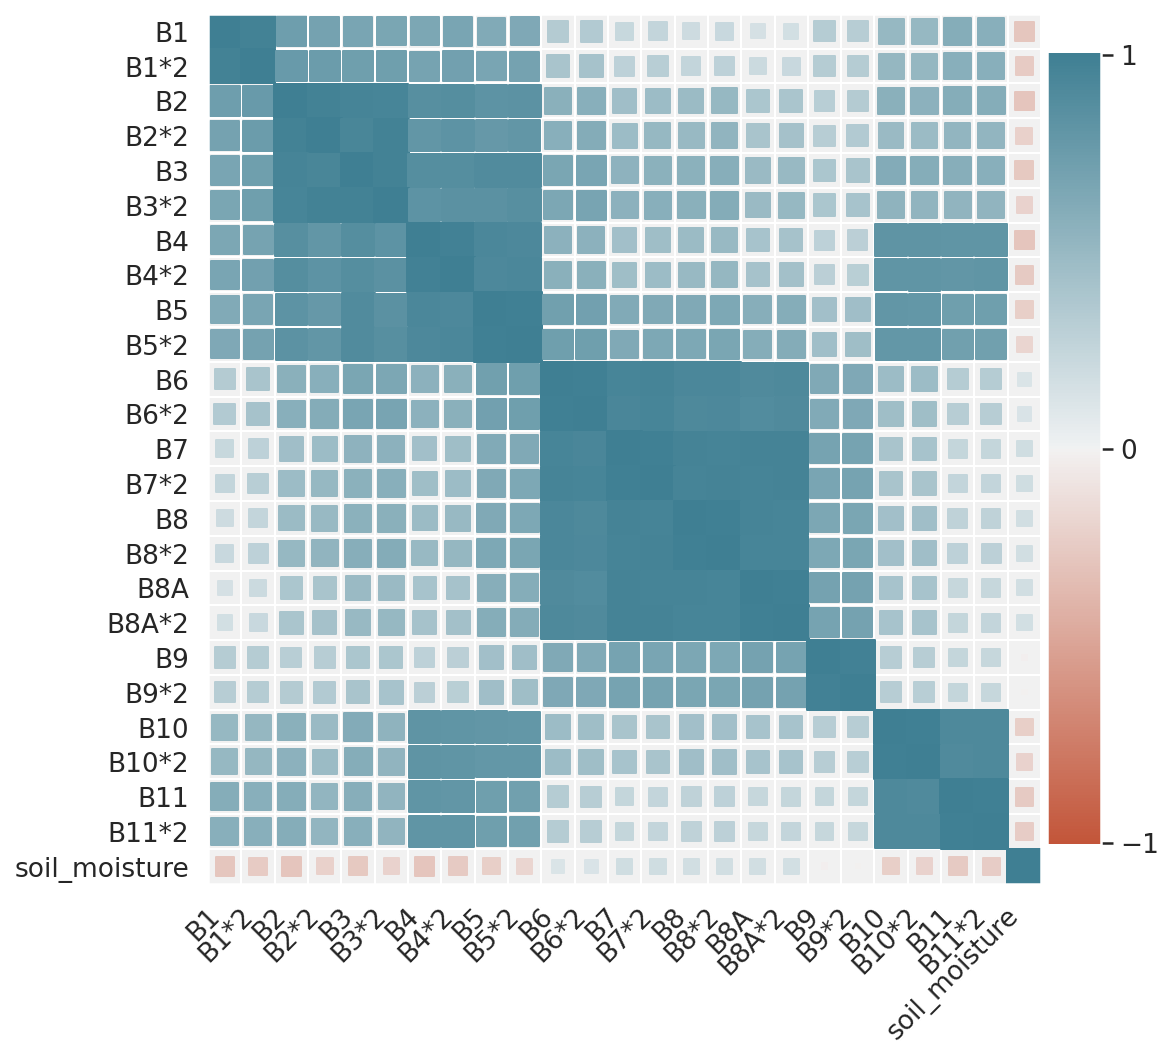

In [70]:

plt.figure(figsize=(8, 8))
corrplot(df_bands.corr(), size_scale=300);

In [ ]:
import os
List_images = []
L = 0.5
directory = r'/content/drive/MyDrive/Senti_Images-2017to2020_Area1'
for filename in os.listdir(directory):
    if filename.endswith("QF.tif") :
        image = tif_to_matrix(os.path.join(directory, filename))
        list_bands=[]
        for i in range (12) :
          band = normalize(image[i])
          list_bands.append(band.mean())
        ndmi = es.normalized_diff(image[7], image[10])
        ndvi = es.normalized_diff(image[7], image[3])
        savi = ((image[7] - image[3]) / (image[7] + image[3] + L)) * (1 + L)
        mndwi = es.normalized_diff(image[2], image[10])
        list_bands.append(ndmi.mean())
        list_bands.append(ndvi.mean())
        list_bands.append(savi.mean())
        list_bands.append(mndwi.mean())
        List_images.append(list_bands)

In [ ]:
List_images = np.array(List_images)

In [ ]:
List_images.shape

(156, 16)

In [ ]:
df_bands = pd.DataFrame(List_images,columns=['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B10','B11','ndmi','ndvi','savi','mndwi'])

In [ ]:
df_bands['soil_moisture'] = df["soil_moisture_depth_0.05"]

In [ ]:
df_bands.corr()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,ndmi,ndvi,savi,mndwi,soil_moisture
B1,1.000000,0.736075,0.676676,0.657467,0.627179,0.341434,0.237412,0.204155,0.159186,0.341038,0.510867,0.601046,-0.049051,-0.026442,-0.026431,-0.381219,-0.277837
B2,0.736075,1.000000,0.967896,0.869923,0.833354,0.577741,0.458722,0.482373,0.389935,0.324935,0.577956,0.605926,-0.293366,0.126439,0.126457,-0.675903,-0.284845
B3,0.676676,0.967896,1.000000,0.877397,0.900197,0.665240,0.557608,0.575168,0.491805,0.388657,0.617647,0.595197,-0.281018,0.113393,0.113409,-0.648488,-0.262425
B4,0.657467,0.869923,0.877397,1.000000,0.933071,0.567598,0.448011,0.484286,0.411917,0.292491,0.825029,0.813502,-0.173913,-0.063358,-0.063340,-0.616223,-0.285676
B5,0.627179,0.833354,0.900197,0.933071,1.000000,0.723292,0.625512,0.639172,0.594573,0.446036,0.809210,0.730176,-0.178278,-0.036817,-0.036802,-0.528353,-0.216407
B6,0.341434,0.577741,0.665240,0.567598,0.723292,1.000000,0.957039,0.930567,0.913241,0.633563,0.482025,0.339238,-0.419182,0.053668,0.053671,-0.270608,0.128807
B7,0.237412,0.458722,0.557608,0.448011,0.625512,0.957039,1.000000,0.972028,0.974816,0.688330,0.410310,0.250425,-0.455522,0.065958,0.065959,-0.203034,0.189250
B8,0.204155,0.482373,0.575168,0.484286,0.639172,0.930567,0.972028,1.000000,0.965317,0.660674,0.447997,0.280445,-0.466706,0.059219,0.059222,-0.259186,0.181463
B8A,0.159186,0.389935,0.491805,0.411917,0.594573,0.913241,0.974816,0.965317,1.000000,0.697483,0.416179,0.246600,-0.406204,0.038830,0.038831,-0.153543,0.176502
B9,0.341038,0.324935,0.388657,0.292491,0.446036,0.633563,0.688330,0.660674,0.697483,1.000000,0.328439,0.251989,-0.273052,0.006091,0.006090,-0.070460,-0.016974


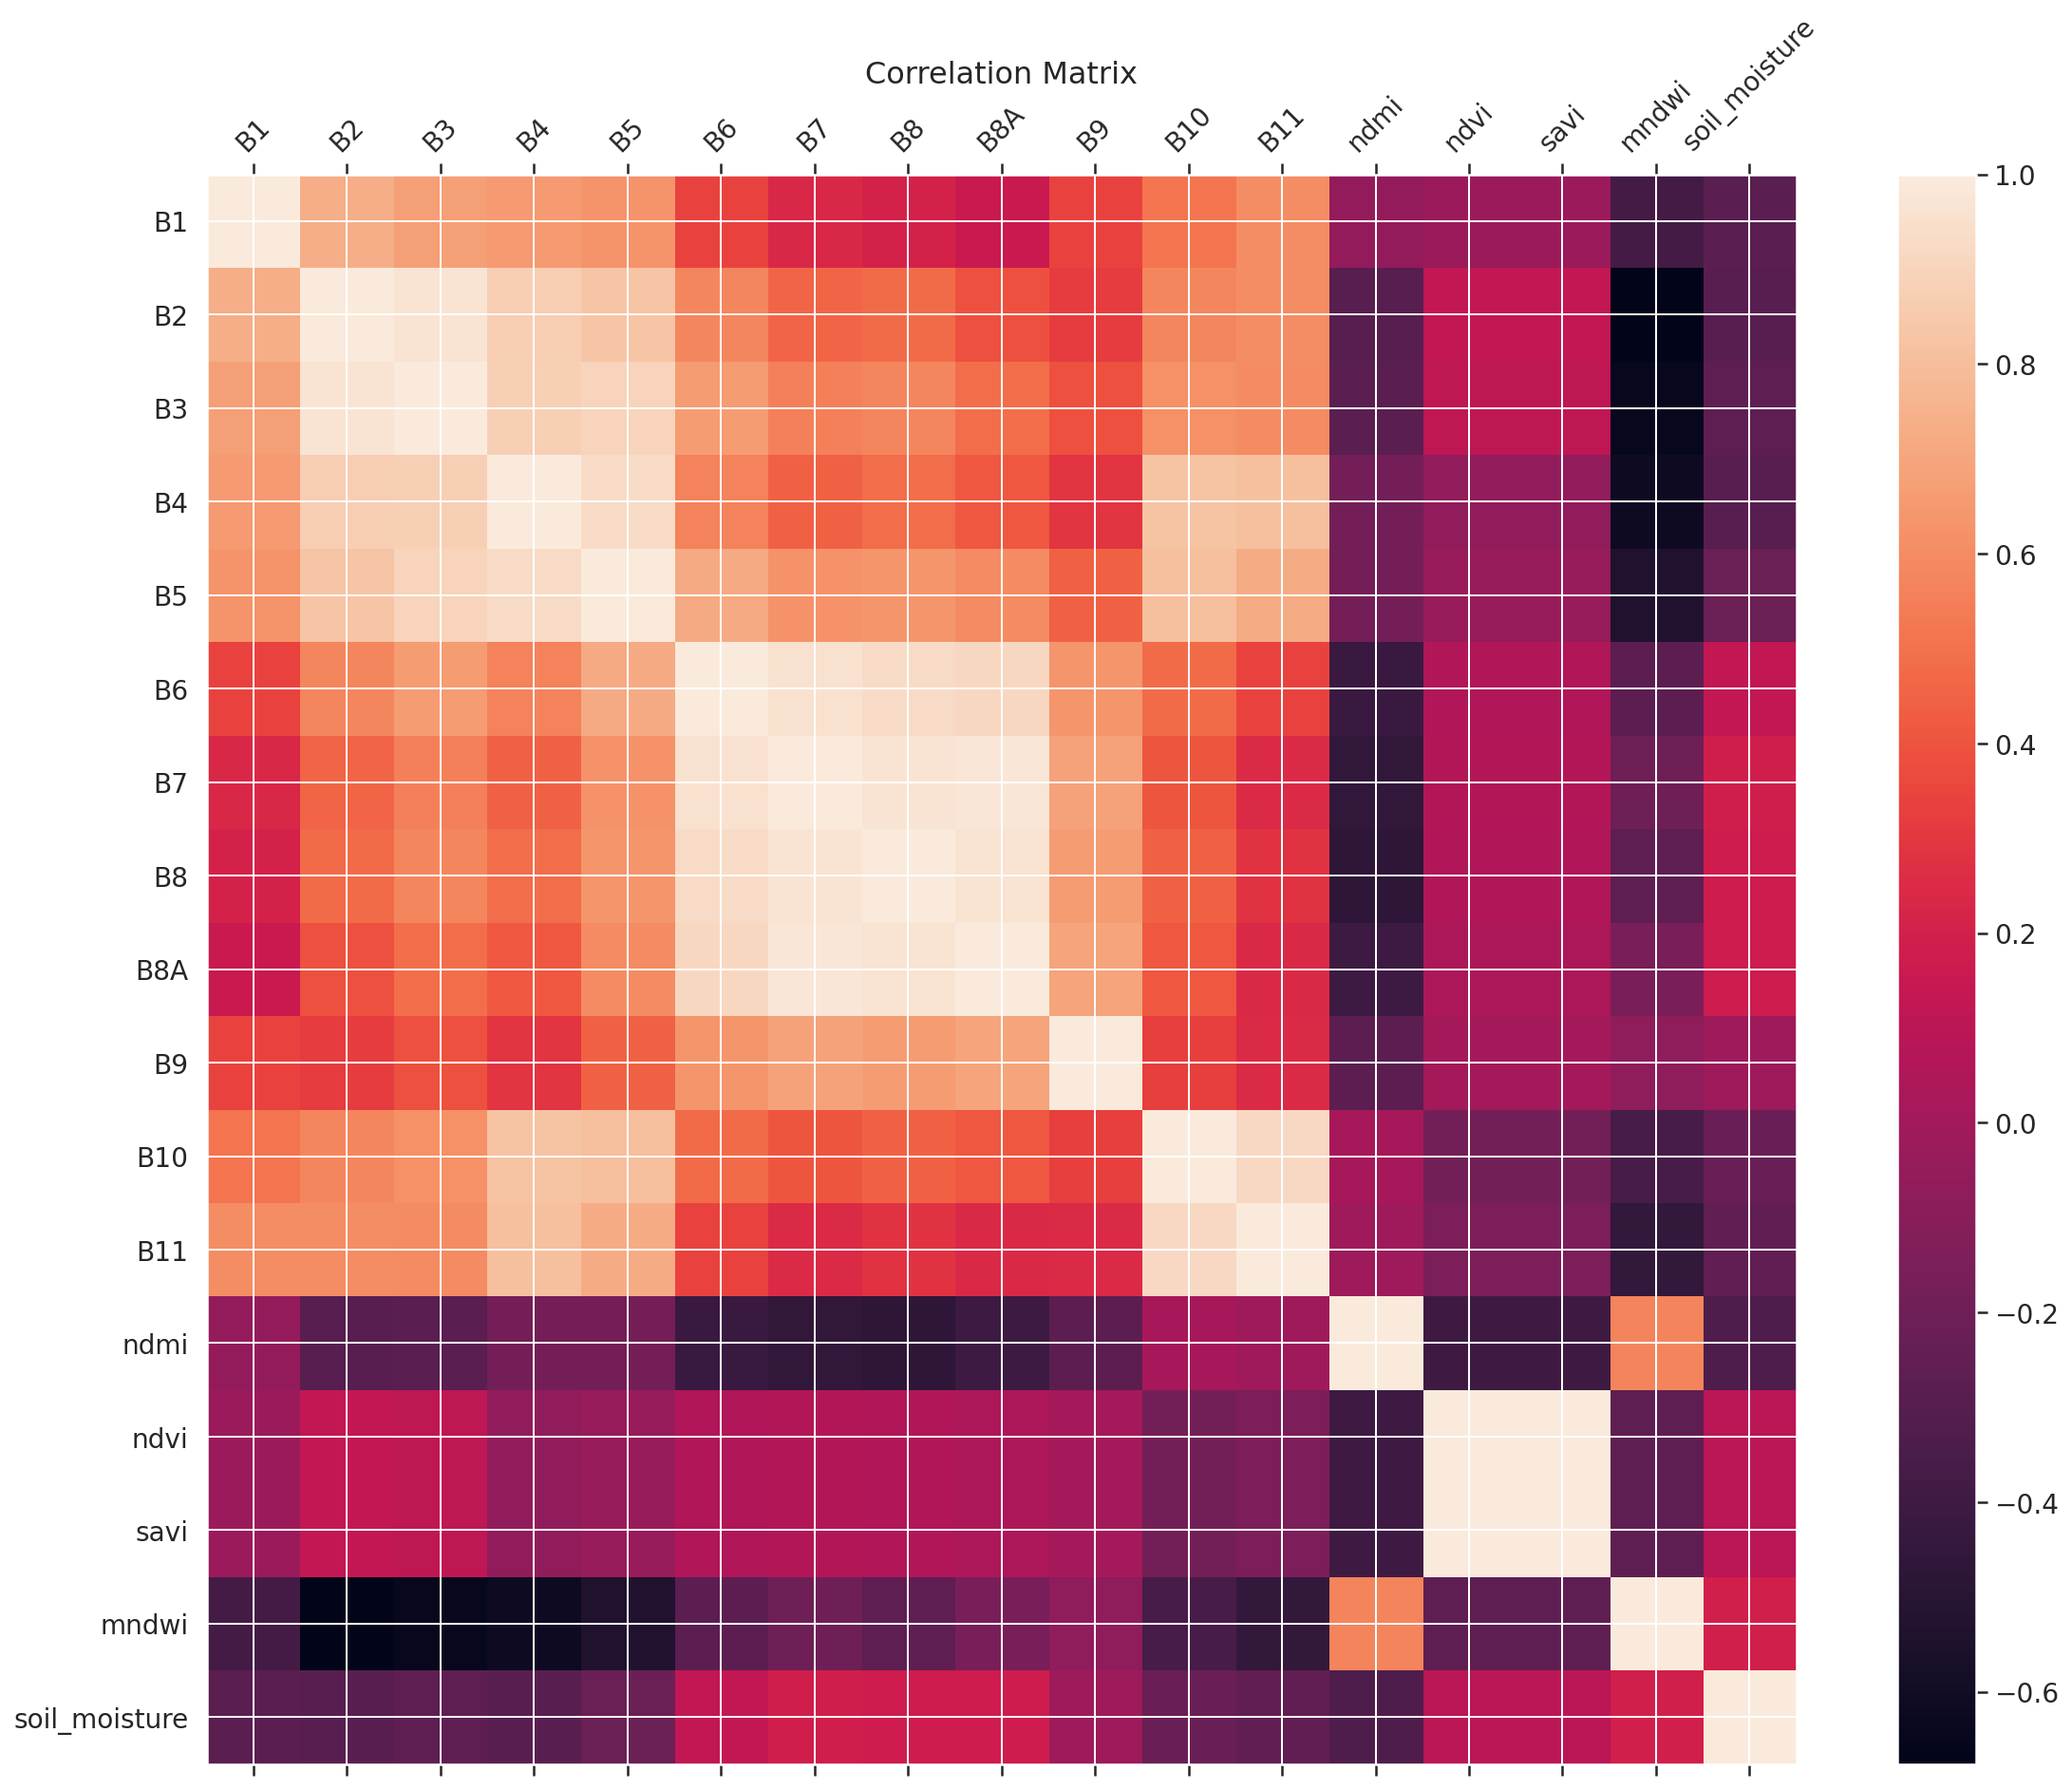

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_bands.corr(), fignum=f.number)
plt.xticks(range(df_bands.select_dtypes(['number']).shape[1]), df_bands.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_bands.select_dtypes(['number']).shape[1]), df_bands.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
import os
List_images = []
L = 0.5
directory = r'/content/drive/MyDrive/Senti_Images-2017to2020_Area1'
for filename in os.listdir(directory):
    if filename.endswith("UL.tif") :
        image = tif_to_matrix(os.path.join(directory, filename))
        list_bands=[]
        band1 = normalize(image[0])
        band5 = normalize(image[4])
        band9 = normalize(image[9])
        cul1 = normalize((image[1]+image[2]+image[3])/3)
        cul2 = normalize((image[5]+image[6]+image[7]+image[8])/4)
        cul3 = normalize((image[10]+image[11])/2)
        list_bands.append(band1.mean())
        list_bands.append(cul1.mean())
        list_bands.append(band5.mean())
        list_bands.append(cul2.mean())
        list_bands.append(band9.mean())
        list_bands.append(cul3.mean())
        ndmi = es.normalized_diff(image[7], image[10])
        ndvi = es.normalized_diff(image[7], image[3])
        savi = ((image[7] - image[3]) / (image[7] + image[3] + L)) * (1 + L)
        mndwi = es.normalized_diff(image[2], image[10])
        list_bands.append(ndmi.mean())
        list_bands.append(ndvi.mean())
        list_bands.append(savi.mean())
        list_bands.append(mndwi.mean())
        List_images.append(list_bands)

In [ ]:
df_bands = pd.DataFrame(List_images,columns=['B1','B2+3+4','B5','B6+7+8+8A','B9','B10+11','ndmi','ndvi','savi','mndwi'])

In [ ]:
df_bands['soil_moisture'] = df["soil_moisture_depth_0.05"]

In [ ]:
df_bands.corr()

,B1,B2+3+4,B5,B6+7+8+8A,B9,B10+11,ndmi,ndvi,savi,mndwi,soil_moisture
B1,1.000000,0.740952,0.665478,0.323863,0.434642,0.537982,-0.245458,0.174858,0.174874,-0.489613,0.000565
B2+3+4,0.740952,1.000000,0.945775,0.629564,0.444130,0.686444,-0.404956,0.204702,0.204722,-0.687420,-0.135634
B5,0.665478,0.945775,1.000000,0.701505,0.485776,0.761273,-0.308107,0.150424,0.150441,-0.606711,-0.173213
B6+7+8+8A,0.323863,0.629564,0.701505,1.000000,0.708830,0.380643,-0.529749,0.231880,0.231886,-0.384750,-0.080294
B9,0.434642,0.444130,0.485776,0.708830,1.000000,0.288115,-0.349959,0.223260,0.223265,-0.239514,-0.113519
B10+11,0.537982,0.686444,0.761273,0.380643,0.288115,1.000000,-0.052476,-0.066954,-0.066939,-0.434252,-0.374264
ndmi,-0.245458,-0.404956,-0.308107,-0.529749,-0.349959,-0.052476,1.000000,-0.452421,-0.452431,0.625333,0.040897
ndvi,0.174858,0.204702,0.150424,0.231880,0.223260,-0.066954,-0.452421,1.000000,1.000000,-0.347480,0.174976
savi,0.174874,0.204722,0.150441,0.231886,0.223265,-0.066939,-0.452431,1.000000,1.000000,-0.347502,0.174966
mndwi,-0.489613,-0.687420,-0.606711,-0.384750,-0.239514,-0.434252,0.625333,-0.347480,-0.347502,1.000000,0.136252


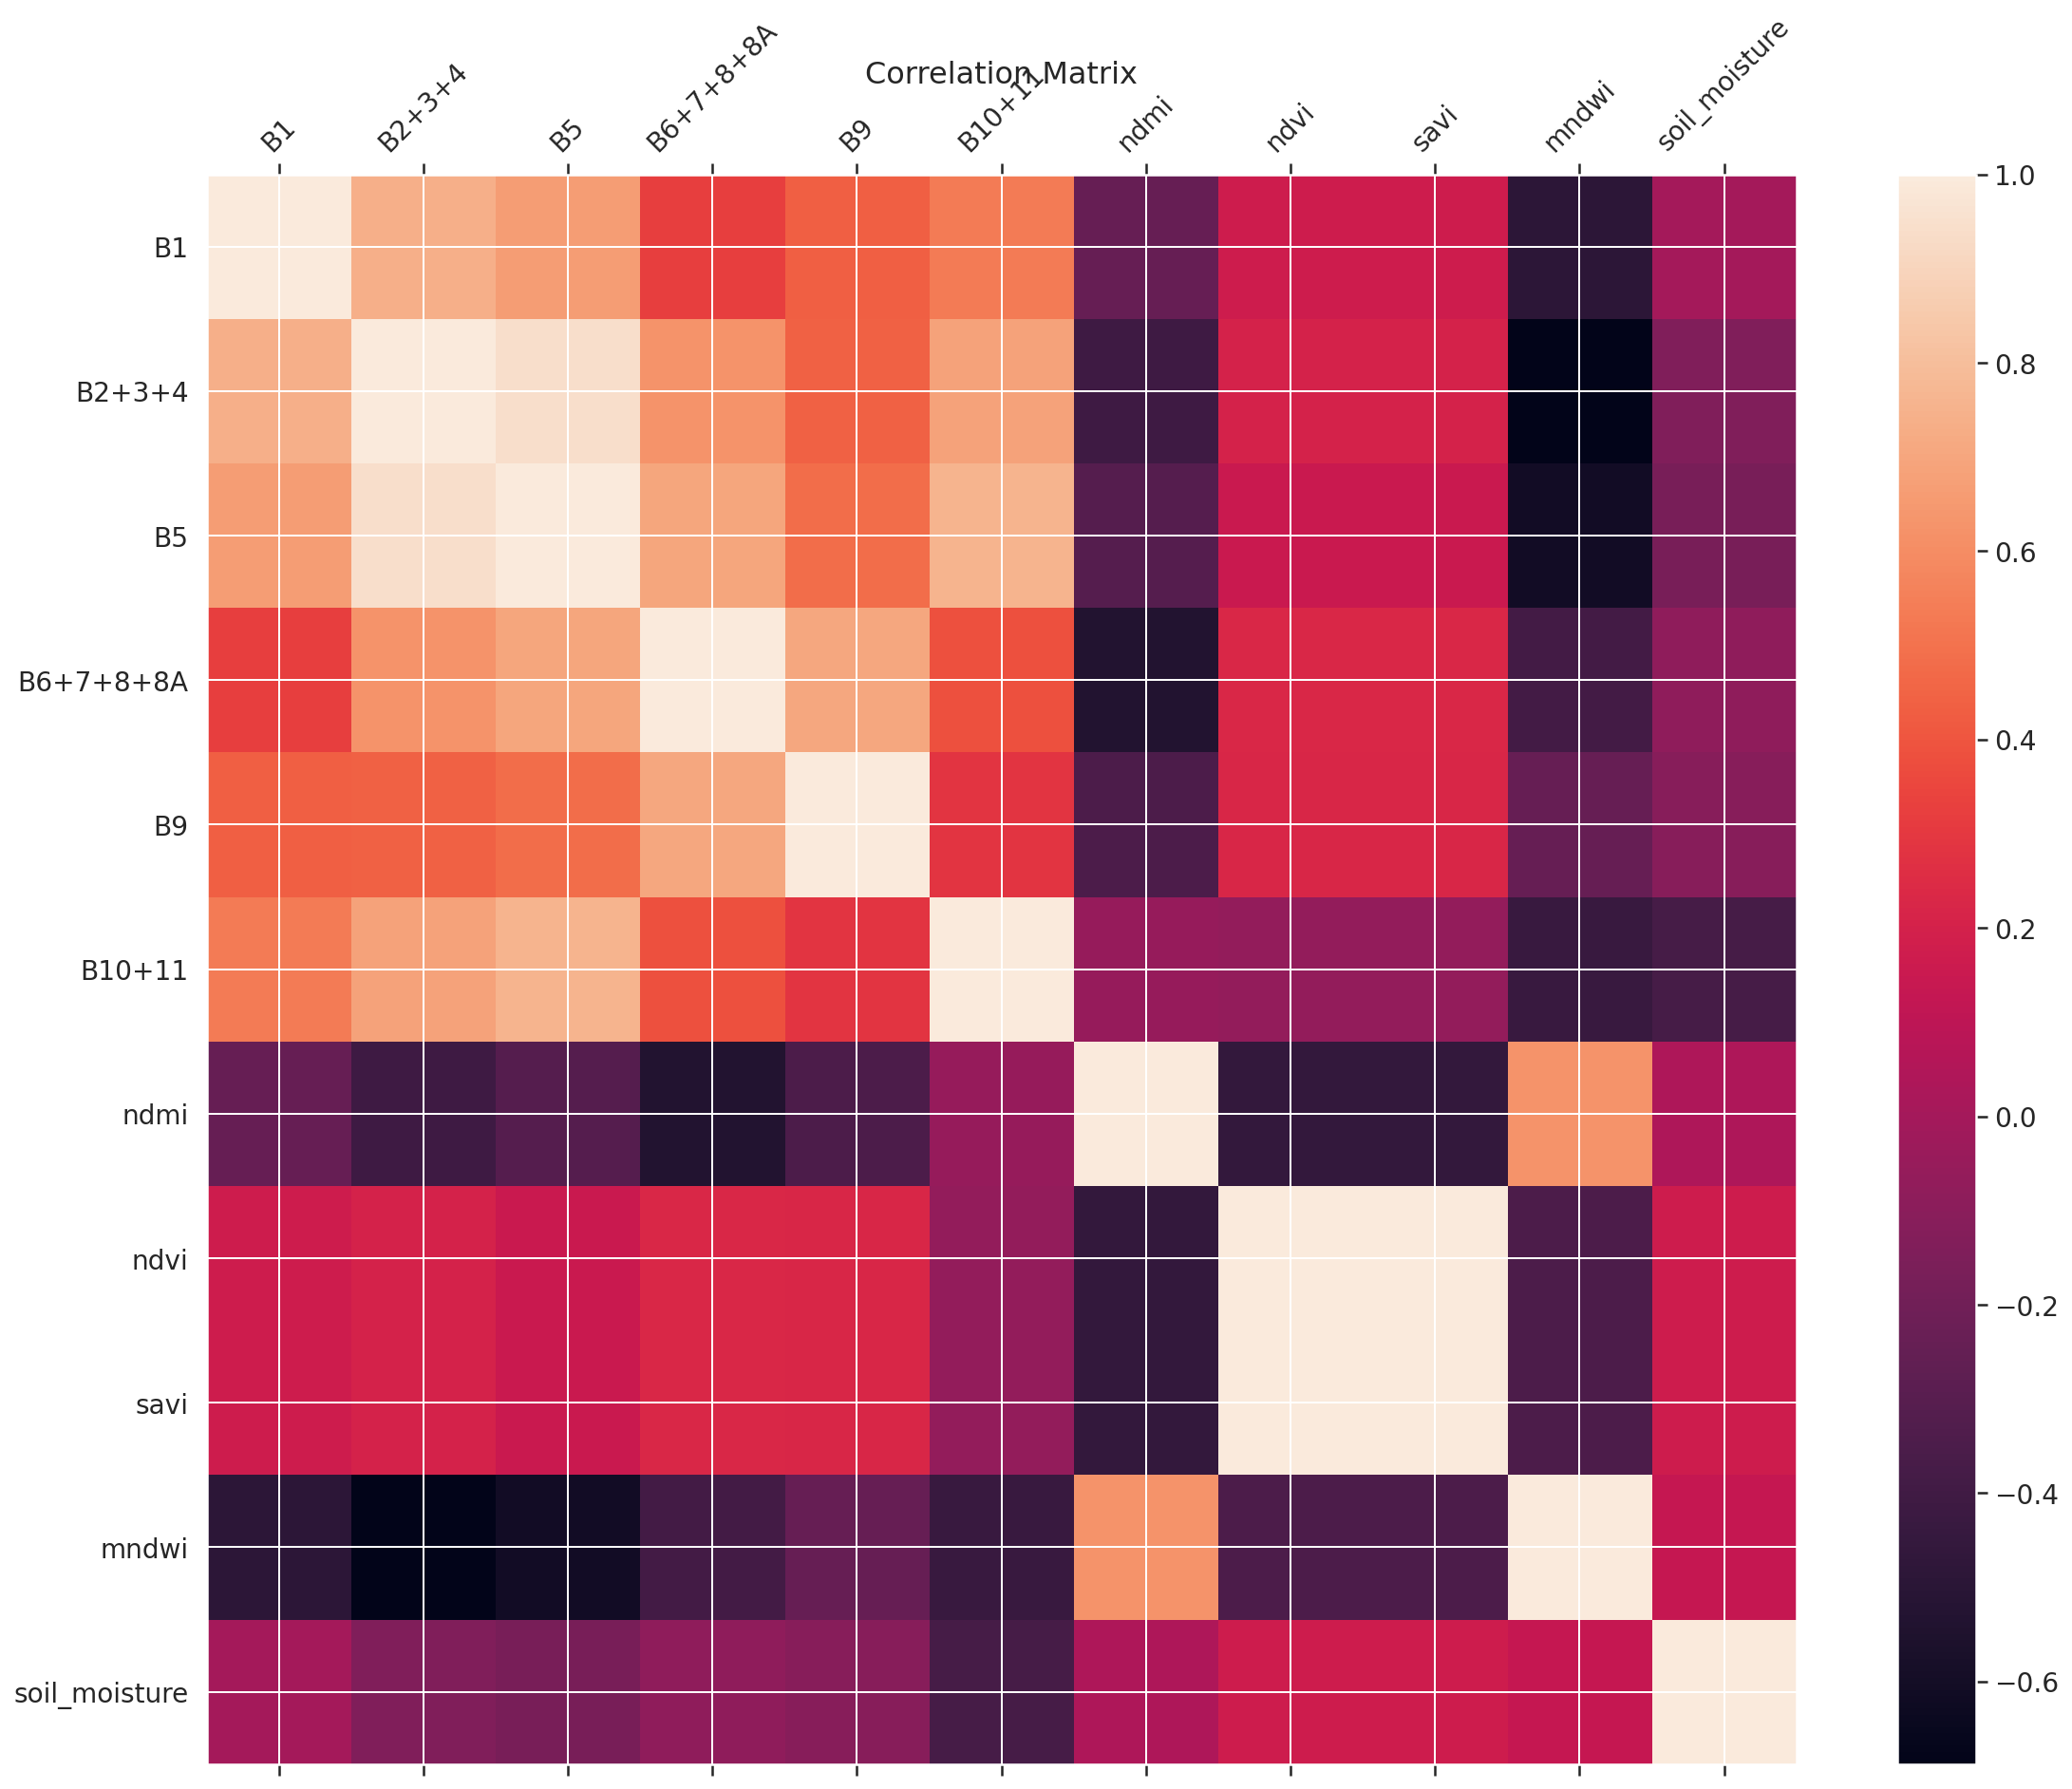

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_bands.corr(), fignum=f.number)
plt.xticks(range(df_bands.select_dtypes(['number']).shape[1]), df_bands.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_bands.select_dtypes(['number']).shape[1]), df_bands.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);